# Parte 1

## Importacion de librerias

In [1]:
import xlrd

In [2]:
import requests

In [3]:
import urllib

In [4]:
import datetime

In [5]:
import pandas as pd

In [6]:
import numpy as np

In [7]:
import matplotlib.pyplot as plt

In [8]:
import seaborn

In [9]:
import numpy

In [10]:
import mysql.connector

ModuleNotFoundError: No module named 'mysql'

In [ ]:
import yaml

In [ ]:
import time
from datetime import datetime

# Parte 1

# Actividades

1) Completar el procesamiento del archivo xls.

2) Generar un nuevo archivo csv con los datos procesados.

3) Importar el nuevo archivo csv teniendo en cuenta tipos de dato correctos para cada columna, indices, etc.

4) Analizar y dar valor a datos faltantes/outliers.

## Lectura de archivo xls

In [12]:
link='https://github.com/lprone/cuandoLlueve/blob/master/Analisis%20exploratorio%20y%20curacion%20de%20datos/LLUVIAS.xls?raw=true'
request = urllib.request.urlretrieve(link) 
book = xlrd.open_workbook(request[0])  

In [13]:
sheets = book.sheet_names()

## Visualización de datos del archivo xls

In [14]:
sheets

['LLUVIAS']

In [15]:
active_sheet = book.sheet_by_name(sheets[0])

In [16]:
active_sheet.nrows

587

In [17]:
active_sheet.ncols

46

## Procesamiento de archivo xls

In [ ]:
lluvias_teodelina = open("lluvias_teodelina.txt", "a+") #a+ lectura y escritura, se crea el fichero si no existe, el puntero se posiciona al final

In [19]:
# TO-DO Definir el valor correcto para estas variables
n_rows = 577 #porque hay datos hasta febrero
#n_columns = 32

date_array = []
rain_array = []


formato_calendario = {}

bisiesto = {
    'ENERO': 31, 'FEB':29, 'MARZO': 31, 'ABRIL': 30, 'MAYO': 31, 'JUNIO':30,
    'JULIO':31, 'AGOSTO':31, 'SEPT': 30, 'OCTUB': 31, 'NOV': 30, 'DIC': 31}

no_bisiesto = {
    'ENERO': 31, 'FEB':28, 'MARZO': 31, 'ABRIL': 30, 'MAYO': 31, 'JUNIO':30,
    'JULIO':31, 'AGOSTO':31, 'SEPT': 30, 'OCTUB': 31, 'NOV': 30, 'DIC': 31}

meses = {
    'ENERO': 1, 'FEB': 2, 'MARZO': 3, 'ABRIL': 4, 'MAYO': 5, 'JUNIO': 6,
    'JULIO': 7, 'AGOSTO': 8, 'SEPT': 9, 'OCTUB': 10, 'NOV': 11, 'DIC': 12}

for row_index in range(n_rows):
            cell_data = active_sheet.cell(row_index, 0).value
            if cell_data=="": continue #break #salteo la fila
            if type(cell_data)==float:
                year=cell_data; print(year)
                #año bisiesto o no?
                if year%4==0 and year%100!=0: 
                    formato_calendario = bisiesto
                    print('bisiesto')
                if year%4==0 and year%100==0 and year%400==0: 
                    formato_calendario = bisiesto
                    print('bisiesto')
                if year%4!=0 : #NO bisiesto
                    formato_calendario = no_bisiesto
                    print('no bisiesto')
                if year%4==0 and year%100==0 and year%400!=0: #NO bisiesto
                    formato_calendario = no_bisiesto
                    print('no bisiesto')
            if type(cell_data)==str:
                month=cell_data 
                n_range = formato_calendario[month]
               
                for col_index in range(n_range+1): # +1 porque cuenta la columna cero 
                    if col_index==0: continue
                    day=col_index
                    cell_data = active_sheet.cell(row_index, col_index).value
                    if cell_data=="": cell_data=0
                                        
                    #guardo día + cant. de lluvias
                    month_num = meses[month]
                    year = int(year)
                    #
                    date_str = str(year) + '/' + str(month_num) + '/' + str(day)
                    # paso a formato datetime
                    date_time = datetime.strptime(date_str, '%Y/%m/%d')
                    rain=cell_data
                    
                    date_array.append(date_time)
                    rain_array.append(rain)
                    #date_rain_array = [date_time, rain]
                    print(date_time, rain)       

In [20]:
matrix = np.array([date_array,rain_array])
matrix = matrix.transpose()

## Generación de archivo csv

In [21]:
# TO-DO Modificar parámetros para generar correctamente el archivo csv
df = pd.DataFrame(matrix, columns = ["date", "rain"])
df.to_csv("rain.csv")

--------------------------------------------------------------------------------------------------------------------------------------------------------

## Importación de archivo csv

In [22]:
# TO-DO Modificar parámetros para leer correctamente el archivo csv
lluvias = pd.read_csv("rain.csv", parse_dates = ["date"], index_col=[0]) #parse_dates = ["date"])


 #parse_dates = True, index_col="date" 

## Procesamiento de archivo csv

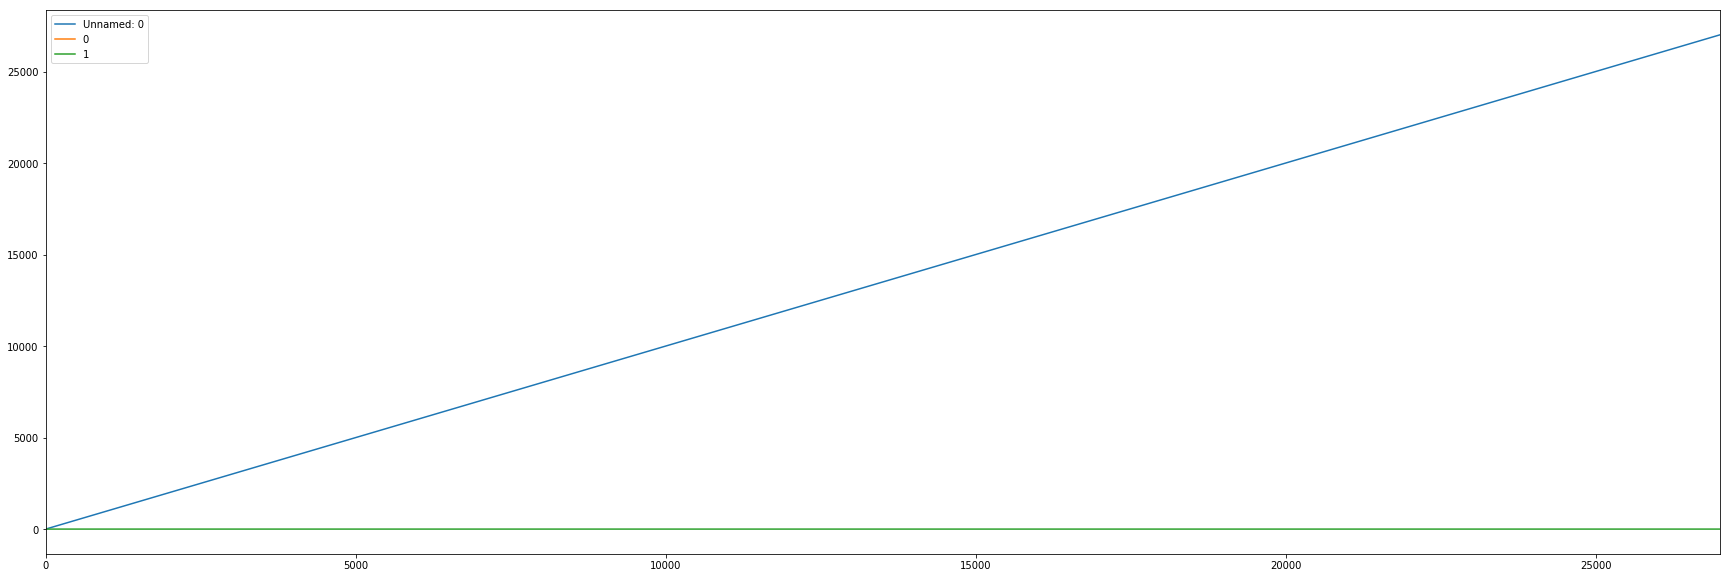

In [23]:
lluvias.plot(figsize=(30,10))

In [24]:
lluvias.describe()

,Unnamed: 0,0,1
count,27002.000000,0.0,27002.0
mean,13500.500000,NaN,0.0
std,7794.950321,NaN,0.0
min,0.000000,NaN,0.0
25%,6750.250000,NaN,0.0
50%,13500.500000,NaN,0.0
75%,20250.750000,NaN,0.0
max,27001.000000,NaN,0.0


In [25]:
lluvias.head()

,Unnamed: 0,0,1
0,0,NaN,0
1,1,NaN,0
2,2,NaN,0
3,3,NaN,0
4,4,NaN,0


# Actividades

1) Completar el procesamiento del archivo xls.

2) Generar un nuevo archivo csv con los datos procesados.

3) Importar el nuevo archivo csv teniendo en cuenta tipos de dato correctos para cada columna, indices, etc.

4) Analizar y dar valor a datos faltantes/outliers.

# Parte 2 (Análisis de Dataset complementario)

# Actividades

1) Importar correctamente el archivo 1758536_junin.csv considerando tipos de dato de cada feature

2) Filtrar los registros y features que resulten relevantes

3) Analizar y corregir valores extraños ",,S"

4) Analizar y dar valor a valores nulos/outliers

In [26]:
datos_junin = pd.read_csv("1758536_junin.csv")

In [27]:
datos_junin.head()

,STATION,NAME,LATITUDE,LONGITUDE,ELEVATION,DATE,PRCP,PRCP_ATTRIBUTES,SNWD,SNWD_ATTRIBUTES,TAVG,TAVG_ATTRIBUTES,TMAX,TMAX_ATTRIBUTES,TMIN,TMIN_ATTRIBUTES
0,ARM00087548,"JUNIN, AR",-34.546,-60.931,79.9,1967-05-05,NaN,NaN,NaN,NaN,15.3,"H,,S",25.0,",,S",11.1,",,S"
1,ARM00087548,"JUNIN, AR",-34.546,-60.931,79.9,1967-05-13,NaN,NaN,NaN,NaN,12.4,"H,,S",25.0,",,S",6.1,",,S"
2,ARM00087548,"JUNIN, AR",-34.546,-60.931,79.9,1967-06-01,5.1,",,S",NaN,NaN,8.9,"H,,S",NaN,NaN,7.8,",,S"
3,ARM00087548,"JUNIN, AR",-34.546,-60.931,79.9,1967-06-02,2.0,",,S",NaN,NaN,9.7,"H,,S",12.2,",,S",8.9,",,S"
4,ARM00087548,"JUNIN, AR",-34.546,-60.931,79.9,1967-06-03,0.0,",,S",NaN,NaN,3.9,"H,,S",11.1,",,S",-2.2,",,S"


In [28]:
datos_junin.shape

(17308, 16)

In [29]:
datos_junin.dtypes

STATION             object
NAME                object
LATITUDE           float64
LONGITUDE          float64
ELEVATION          float64
DATE                object
PRCP               float64
PRCP_ATTRIBUTES     object
SNWD               float64
SNWD_ATTRIBUTES     object
TAVG               float64
TAVG_ATTRIBUTES     object
TMAX               float64
TMAX_ATTRIBUTES     object
TMIN               float64
TMIN_ATTRIBUTES     object
dtype: object

In [30]:
types={
    'STATION': str,
    'NAME': str,
    'PRCP_ATTRIBUTES': str,
    'SNWD_ATTRIBUTES': str,
    'TAVG_ATTRIBUTES': str,
    'TMAX_ATTRIBUTES': str,
    'TMIN_ATTRIBUTES': str,
}
datos_junin_types = pd.read_csv("1758536_junin.csv", parse_dates=["DATE"], dtype=types, usecols= [ 'DATE',
                                                                                                  'PRCP', 'PRCP_ATTRIBUTES',
                                                                                                  'SNWD', 'SNWD_ATTRIBUTES',
                                                                                                  'TAVG', 'TAVG_ATTRIBUTES',
                                                                                                  'TMAX', 'TMAX_ATTRIBUTES',
                                                                                                  'TMIN', 'TMIN_ATTRIBUTES'])
station_metadata_value = '''{} [ID={}, LAT={:f}, LONG={:f}, ELEV={:f}]'''.format(datos_junin.at[1, 'NAME'], 
                datos_junin.at[1, 'STATION'], 
                datos_junin.at[1, 'LATITUDE'], 
                round(datos_junin.at[1, 'LONGITUDE'], 3),  
                datos_junin.at[1, 'ELEVATION'])


datos_junin_types['STATION'] = station_metadata_value
datos_junin_types.dtypes

DATE               datetime64[ns]
PRCP                      float64
PRCP_ATTRIBUTES            object
SNWD                      float64
SNWD_ATTRIBUTES            object
TAVG                      float64
TAVG_ATTRIBUTES            object
TMAX                      float64
TMAX_ATTRIBUTES            object
TMIN                      float64
TMIN_ATTRIBUTES            object
STATION                    object
dtype: object

In [31]:
datos_junin_types

,DATE,PRCP,PRCP_ATTRIBUTES,SNWD,SNWD_ATTRIBUTES,TAVG,TAVG_ATTRIBUTES,TMAX,TMAX_ATTRIBUTES,TMIN,TMIN_ATTRIBUTES,STATION
0,1967-05-05,NaN,NaN,NaN,NaN,15.3,"H,,S",25.0,",,S",11.1,",,S","JUNIN, AR [ID=ARM00087548, LAT=-34.546000, LON..."
1,1967-05-13,NaN,NaN,NaN,NaN,12.4,"H,,S",25.0,",,S",6.1,",,S","JUNIN, AR [ID=ARM00087548, LAT=-34.546000, LON..."
2,1967-06-01,5.1,",,S",NaN,NaN,8.9,"H,,S",NaN,NaN,7.8,",,S","JUNIN, AR [ID=ARM00087548, LAT=-34.546000, LON..."
3,1967-06-02,2.0,",,S",NaN,NaN,9.7,"H,,S",12.2,",,S",8.9,",,S","JUNIN, AR [ID=ARM00087548, LAT=-34.546000, LON..."
4,1967-06-03,0.0,",,S",NaN,NaN,3.9,"H,,S",11.1,",,S",-2.2,",,S","JUNIN, AR [ID=ARM00087548, LAT=-34.546000, LON..."
5,1967-06-04,NaN,NaN,NaN,NaN,1.4,"H,,S",10.0,",,S",-5.0,",,S","JUNIN, AR [ID=ARM00087548, LAT=-34.546000, LON..."
6,1967-06-05,NaN,NaN,NaN,NaN,3.9,"H,,S",NaN,NaN,1.1,",,S","JUNIN, AR [ID=ARM00087548, LAT=-34.546000, LON..."
7,1967-06-06,NaN,NaN,NaN,NaN,5.6,"H,,S",NaN,NaN,NaN,NaN,"JUNIN, AR [ID=ARM00087548, LAT=-34.546000, LON..."
8,1967-06-10,NaN,NaN,NaN,NaN,3.9,"H,,S",15.0,",,S",-2.8,",,S","JUNIN, AR [ID=ARM00087548, LAT=-34.546000, LON..."
9,1967-06-11,NaN,NaN,NaN,NaN,4.3,"H,,S",13.9,",,S",0.0,",,S","JUNIN, AR [ID=ARM00087548, LAT=-34.546000, LON..."


Como se puede observar en el resumen anterior la columna de fecha se parseo en formato datetime y los valores numericos fueron representados automaticamente en formato float, asi como tambien se indico formato para las columnas con tipo objeto que fueran tipo string. Finalmente las columnas 'STATION', 'LATITUDE', 'LONGITUDE', 'ELEVATION' se combinaron en una sola como metadata de las estancion para la cual se tomaron todas las medidas, ya que no suman un valor a las estadisticas que se pretenden analizar.

In [32]:
datos_junin_types.describe(include='all')

,DATE,PRCP,PRCP_ATTRIBUTES,SNWD,SNWD_ATTRIBUTES,TAVG,TAVG_ATTRIBUTES,TMAX,TMAX_ATTRIBUTES,TMIN,TMIN_ATTRIBUTES,STATION
count,17308,9744.000000,9744,20.00000,20,17308.000000,17308,7162.000000,7162,14318.000000,14318,17308
unique,17308,NaN,2,NaN,2,NaN,1,NaN,2,NaN,2,1
top,1967-09-20 00:00:00,NaN,",,S",NaN,",,S",NaN,"H,,S",NaN,",,S",NaN,",,S","JUNIN, AR [ID=ARM00087548, LAT=-34.546000, LON..."
freq,1,NaN,6601,NaN,17,NaN,17308,NaN,7160,NaN,14316,17308
first,1967-05-05 00:00:00,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
last,2019-05-26 00:00:00,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
mean,NaN,4.008087,NaN,145.10000,NaN,16.123995,NaN,23.726236,NaN,9.855559,NaN,NaN
std,NaN,12.347039,NaN,320.96268,NaN,5.852709,NaN,6.544230,NaN,6.148457,NaN,NaN
min,NaN,0.000000,NaN,10.00000,NaN,-0.200000,NaN,6.400000,NaN,-8.000000,NaN,NaN
25%,NaN,0.000000,NaN,10.00000,NaN,11.600000,NaN,18.600000,NaN,5.200000,NaN,NaN


Como se puede observar en el resumen anterior, la columna SNWD (Snow depth) solo posee 20 mediciones de un total de 17308 lo que representa menos de 1% de las mediciones por lo que se decide excluirla junto con sus atributos del nuevo dataset conformado.

In [33]:
df_junin = datos_junin_types.drop(['SNWD', 'SNWD_ATTRIBUTES'], axis=1)
df_junin

,DATE,PRCP,PRCP_ATTRIBUTES,TAVG,TAVG_ATTRIBUTES,TMAX,TMAX_ATTRIBUTES,TMIN,TMIN_ATTRIBUTES,STATION
0,1967-05-05,NaN,NaN,15.3,"H,,S",25.0,",,S",11.1,",,S","JUNIN, AR [ID=ARM00087548, LAT=-34.546000, LON..."
1,1967-05-13,NaN,NaN,12.4,"H,,S",25.0,",,S",6.1,",,S","JUNIN, AR [ID=ARM00087548, LAT=-34.546000, LON..."
2,1967-06-01,5.1,",,S",8.9,"H,,S",NaN,NaN,7.8,",,S","JUNIN, AR [ID=ARM00087548, LAT=-34.546000, LON..."
3,1967-06-02,2.0,",,S",9.7,"H,,S",12.2,",,S",8.9,",,S","JUNIN, AR [ID=ARM00087548, LAT=-34.546000, LON..."
4,1967-06-03,0.0,",,S",3.9,"H,,S",11.1,",,S",-2.2,",,S","JUNIN, AR [ID=ARM00087548, LAT=-34.546000, LON..."
5,1967-06-04,NaN,NaN,1.4,"H,,S",10.0,",,S",-5.0,",,S","JUNIN, AR [ID=ARM00087548, LAT=-34.546000, LON..."
6,1967-06-05,NaN,NaN,3.9,"H,,S",NaN,NaN,1.1,",,S","JUNIN, AR [ID=ARM00087548, LAT=-34.546000, LON..."
7,1967-06-06,NaN,NaN,5.6,"H,,S",NaN,NaN,NaN,NaN,"JUNIN, AR [ID=ARM00087548, LAT=-34.546000, LON..."
8,1967-06-10,NaN,NaN,3.9,"H,,S",15.0,",,S",-2.8,",,S","JUNIN, AR [ID=ARM00087548, LAT=-34.546000, LON..."
9,1967-06-11,NaN,NaN,4.3,"H,,S",13.9,",,S",0.0,",,S","JUNIN, AR [ID=ARM00087548, LAT=-34.546000, LON..."


In [34]:
total_reg = 17308
prcp_nans = df_junin[df_junin.PRCP.isna()==True].PRCP.shape[0]
tavg_nans = df_junin[df_junin.TAVG.isna()==True].TAVG.shape[0]
tmax_nans = df_junin[df_junin.TMAX.isna()==True].TMAX.shape[0]
tmin_nans = df_junin[df_junin.TMIN.isna()==True].TMIN.shape[0]
print ("Porcentaje de valores nulos por tipo de medicion:\n")
print ("PRCP: ", round(prcp_nans/total_reg, 3), "\n")
print ("TAVG: ", round(tavg_nans/total_reg, 3), "\n")
print ("TMAX: ", round(tmax_nans/total_reg, 3), "\n")
print ("TMIN: ", round(tmin_nans/total_reg, 3), "\n")

Porcentaje de valores nulos por tipo de medicion:

PRCP:  0.437 

TAVG:  0.0 

TMAX:  0.586 

TMIN:  0.173 



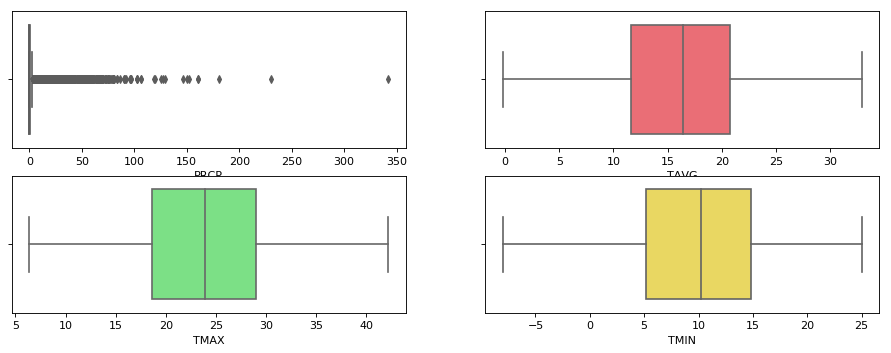

In [35]:
BLUE = '#35A7FF'
RED = '#FF5964'
GREEN = '#6BF178'
YELLOW = '#FFE74C'
plt.figure(figsize=(14, 5), dpi= 80, facecolor='w', edgecolor='k')
plt.subplot(2, 2, 1)
seaborn.boxplot(x=df_junin['PRCP'], color=BLUE)
#plt.figure(figsize=(5,4))
plt.subplot(2, 2, 2)
seaborn.boxplot(x=df_junin['TAVG'], color=RED)
#plt.figure(figsize=(5,4))
plt.subplot(2, 2, 3)
seaborn.boxplot(x=df_junin['TMAX'], color=GREEN)
plt.subplot(2, 2, 4)
seaborn.boxplot(x=df_junin['TMIN'], color=YELLOW)

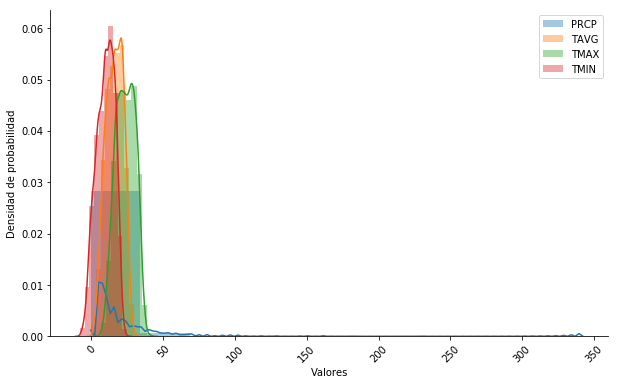

In [36]:
plt.figure(figsize=(10,6))
seaborn.distplot(df_junin['PRCP'].dropna(), bins=10, label='PRCP')
seaborn.distplot(df_junin['TAVG'].dropna(), bins=10, label='TAVG')
seaborn.distplot(df_junin['TMAX'].dropna(), bins=10, label='TMAX')
seaborn.distplot(df_junin['TMIN'].dropna(), bins=10, label='TMIN')
plt.xticks(rotation=45)
plt.ylabel('Densidad de probabilidad')
plt.xlabel('Valores')
plt.legend()
seaborn.despine()

In [37]:
df_junin['PRCP'].describe()

count    9744.000000
mean        4.008087
std        12.347039
min         0.000000
25%         0.000000
50%         0.000000
75%         1.000000
max       341.900000
Name: PRCP, dtype: float64

Como se puede observar el porcentaje de valores nulos para cada medicion arranca como minimo en 17% y llega hasta un 58%
siendo cantidades grandes para por ejemplo decidir reemplazar los mismos por el valor pronmedio de cada medicion. Por lo que se decide no reemplazar ningun valor nulo.
Tambien se puede observar en los grafico de caja que la unica medicion que posee varios outliers es la 'PRCP', por lo que sera la unica columna saneada. Se eliminaran todas las mediciones que esten por a +/-3 desviaciones estandares  pertenecientes a la medicion 'PRCP'.

In [38]:
#prcp = df_junin['PRCP']
# Eliminar filas a más de 3 desviaciones estándares de la media
#mask_prcp = numpy.abs(prcp-df_junin.PRCP.mean()) <= (3*df_junin.PRCP.std())
#data = prcp[mask_prcp]
outliers = df_junin[(df_junin.PRCP > (df_junin.PRCP.mean() + 3*df_junin.PRCP.std()))
                    & ((df_junin.PRCP_ATTRIBUTES==',,S') | (df_junin.PRCP_ATTRIBUTES=='D,,S')) ]
print("Filas a ser removidas", outliers.PRCP.count())
df_junin.drop(outliers.index, inplace=True)

Filas a ser removidas 218


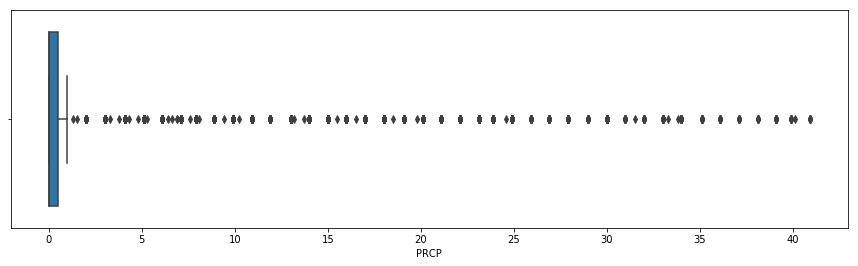

In [39]:
plt.figure(figsize=(15,4))
seaborn.boxplot(x=df_junin['PRCP'])

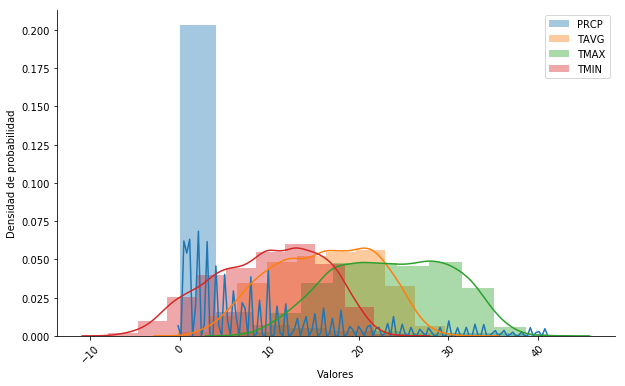

In [40]:
plt.figure(figsize=(10,6))
seaborn.distplot(df_junin['PRCP'].dropna(), bins=10, label='PRCP')
seaborn.distplot(df_junin['TAVG'].dropna(), bins=10, label='TAVG')
seaborn.distplot(df_junin['TMAX'].dropna(), bins=10, label='TMAX')
seaborn.distplot(df_junin['TMIN'].dropna(), bins=10, label='TMIN')
plt.xticks(rotation=45)
plt.ylabel('Densidad de probabilidad')
plt.xlabel('Valores')
plt.legend()
seaborn.despine()

In [41]:
df_junin['PRCP'].describe()

count    9526.000000
mean        2.613363
std         6.705045
min         0.000000
25%         0.000000
50%         0.000000
75%         0.500000
max        40.900000
Name: PRCP, dtype: float64

Los valores por encima de 3 desviaciones estandares en la columna precipitacion (PRCP) en conjunto con los atributos  'D,,S' o ',,S' (la 'S' indica que los valores diarios derivados del sistema global de telecomunicaciones pueden diferir significantemente de los datos diarios verdaderos, particularmente para las precipitaciones) en la columna atributos (PRCP_ATTRIBUTES) son las condiciones que se toman como filtros para eliminar los outliers. Despues de removerlos podemos observar que en el grafico de caja siguen existiendo outliers pero estos estan dentro de la distribucion de probabilidad de las demas columnas (TAVG, TMAX, TMIN) por lo que de eliminarlos tambien estariamos eliminando mediciones
validas para esas columnas.

# Parte 3 (Obtener datos desde una API)

# Actividades

1) Registrarse en la web https://darksky.net/ para obtener el token necesario para consultar su API

2) Siguiendo como ejemplo el notebook API Example consultar la API https://api.darksky.net y obtener datos correspondiente a los años 2015 y 2016

3) Generar un nuevo dataset a partir de los datos (time, summary, temperature, humidity, pressure, windBearing, uvIndex, temperatureMin, temperatureMax)

4) Analizar y dar valor a valores nulos/outliers

In [42]:
# Importacion de librerias
import configAPI
import datetime
import mysql.connector
import requests

import datetime as dt
import numpy as np
import pandas as pd
import json
from   pandas.io.json import json_normalize
import seaborn as sb
import matplotlib.pyplot as plt
from   matplotlib.cbook import boxplot_stats
from  sklearn.preprocessing import StandardScaler
from  sklearn.decomposition import PCA

# .:INFORMACIÓN SOBRE MÓDULO:.
El presente módulo utiliza datos descargados de la API ***Dark Sky*** (documentación: https://darksky.net/dev/docs ), basados en los parámetros seteados
por el archivo ***configAPI***. La elección de los parámetros permite, en este caso, obtener información meteorológica de Teodelina de los años 2015 y 2016.

De precisar una nueva descarga de datos:
1. Actualizar el archivo ***configAPI*** con el ***token*** otorgado por la página y las **coordenadas** del lugar (si se tratase de un nuevo objetivo) 
2. Setear a ***True*** la variable **descarga**
3. Renombrar (recomendado) la variable **nombre_json**, con el fin de conservar el archivo existente
4. Modificar la lista **años** (en caso de ser necesario)

# .:INFORMACIÓN GENERAL DE LA CONSULTA:.
La obtención de los datos radica en ejecutar una solicitud a la API basada en la información contenida en la *url* de la consulta.
En este trabajo, la *url* presenta la siguiente estructura:

---
---

https://api.darksky.net/forecast/key/latitude,longitude,date?exclude=flags,hourly&units=ca

---
---
donde:
- ***latitude*** y ***longitude*** son las coordenadas geográficas del lugar de interés
- ***date*** es la fecha y hora en formato *timestamp*
- ***exclude*** deshabilita la descarga de los bloques que se listan luego del símbolo de igualdad
- ***units*** establece el sistema de unidades que se utilizará sobre los datos, en este caso ***ca*** es similar al sistema ***si*** exceptuando *windSpeed* y *windGust* que están en kilómetros por hora.

Luego de ejecutar la solicitud se obtiene la siguiente información en formato json:

![Salida Api](json.png)

En este trabajo se utilizarán datos del bloque ***currently*** (*time* y *temperature*) y ***daily*** (*time*, *summary*, *humidity*, *pressure*, *windBearing*, *uvIndex*, *temperatureMin*, *temperatureMax*)

## .::Primera Parte: Carga de Datos::.

In [43]:
meses = np.arange(1,13,1)              # meses en numero.
diasXmes = {1:31,                      # diccionario de dias por mes, durante la descarga de datos ---
            2:28,                      # se agrega condicion sobre febrero si es bisiesto
            3:31,
            4:30,
            5:31,
            6:30,
            7:31,
            8:31,
            9:30,
            10:31,
            11:30,
            12:31
           }

mesString = {1:'ENERO',               # diccionario numero mes vs nombre del mes
             2:'FEBRERO',
             3:'MARZO',
             4:'ABRIL',
             5:'MAYO',
             6:'JUNIO',
             7:'JULIO',
             8:'AGOSTO',
             9:'SEPTIEMBRE',
             10:'OCTUBRE',
             11:'NOVIEMBRE',
             12:'DICIEMBRE'
            }

In [44]:
descargar = False
nombre_json = 'json_.txt' # se recomienda modificar nombre_json si va a realizar una nueva descarga

In [45]:
# solicitud de datos para los años de la consigna
if descargar==True:
    baseUrl = "https://api.darksky.net/forecast/<key>/<latitude>,<longitude>,<date>?exclude=flags,hourly&units=ca"
    jasons = []
    años = [2015,2016] # años consigna. Modificar en caso de ser necesario
    for año in años:
        for mes in meses:
            print('\n\n***********************MES: ',mesString[mes])
            if año%4==0 and mes==2:
                dias = 29
                #print(dias,mes,año,'soy bisisesto')
            else:
                dias = diasXmes[mes]
                #print(dias,mes,año)
            for dia in np.arange(1,dias+1,1):
                print(dia,mes,año)
                date = dt.datetime(año,mes,dia,23,59)
                date_timestamp = int(dt.datetime.timestamp(date)) 
                replacedUrl = baseUrl.replace("<key>", configAPI.API_KEY).replace("<latitude>", str(config.TEODELINA_LAT)).replace("<longitude>", str(config.TEODELINA_LONG)).replace("<date>",str(int(date_timestamp)))
                r = requests.get(url = replacedUrl) 
                jasons.append(r.json())

    with open(nombre_json, 'w') as file:
        file.write(json.dumps(jasons))

In [46]:
# se cargan los datos
with open(nombre_json) as archivo:
    json_data = json.load(archivo)

In [47]:
datos_solicitados = ['time','summary','humidity','pressure','windBearing','uvIndex','temperatureMin','temperatureMax']
datos = {}               # diccionario que almacena el valor de cada variable solicitada
dbDatos = pd.DataFrame() # dataframe de los datos

# creacion de dataframe
for i in range(len(json_data)):
    timeC = json_data[i]['currently']['time']
    datos.update({'timeC':timeC})  # hora de tempreratura actual
    try:
        temperature = json_data[i]['currently']['temperature']
        datos.update({'temperature':temperature})
    except:
        temperature = np.nan
        datos.update({'temperature':temperature})
    if 'daily' in json_data[i].keys():
        datos_del_dia = list(json_data[i]['daily']['data'][0].keys())
        faltantes     = list(set(datos_solicitados)-set(datos_del_dia))
        existentes    = list(set(datos_solicitados)-set(faltantes))
        for existente in range(len(existentes)):
            datos.update({existentes[existente]:json_data[i]['daily']['data'][0][existentes[existente]]})
        for faltante in range(len(faltantes)):
            datos.update({faltantes[faltante]:np.nan})
    else:
        for solicitados in range(len(datos_solicitados)):
            datos.update({datos_solicitados[solicitados]:np.nan})
    dbDatos = dbDatos.append(datos,ignore_index=True)

## .::Segunda Parte: Outliers Y Datos Nulos::.

In [48]:
dbDatos_sin_bloque_daily = dbDatos[dbDatos.time.isna()==True]
dbDatos_con_bloque_daily = dbDatos[dbDatos.time.isna()==False]

tot_datos_sin_daily = len(dbDatos_sin_bloque_daily)
tot_datos_con_daily = len(dbDatos_con_bloque_daily)
print('Cantidad de días que NO contienen al bloque Daily: ',tot_datos_sin_daily,'\nCantidad de días que SÍ contienen al bloque Daily: ',tot_datos_con_daily)

Cantidad de días que NO contienen al bloque Daily:  49 
Cantidad de días que SÍ contienen al bloque Daily:  682


### OUTLIERS:

In [49]:
estadisticos = dbDatos.describe()
estadisticos

,humidity,pressure,temperature,temperatureMax,temperatureMin,time,timeC,uvIndex,windBearing
count,678.000000,671.000000,720.000000,678.000000,678.000000,6.820000e+02,7.310000e+02,682.000000,677.000000
mean,0.739985,1015.419911,19.595111,21.968894,10.969735,1.451201e+09,1.451660e+09,4.799120,128.471196
std,0.109389,5.986913,6.372183,6.332503,5.724783,1.828419e+07,1.824473e+07,2.755712,97.926964
min,0.360000,997.890000,6.210000,9.210000,-3.910000,1.420081e+09,1.420124e+09,0.000000,0.000000
25%,0.670000,1011.085000,14.210000,17.010000,6.610000,1.435309e+09,1.435892e+09,2.000000,42.000000
50%,0.740000,1015.160000,19.210000,22.020000,11.005000,1.450796e+09,1.451660e+09,4.000000,112.000000
75%,0.820000,1019.315000,24.632500,27.200000,15.810000,1.467234e+09,1.467428e+09,7.000000,193.000000
max,0.980000,1035.290000,33.500000,35.610000,22.910000,1.482894e+09,1.483196e+09,11.000000,359.000000


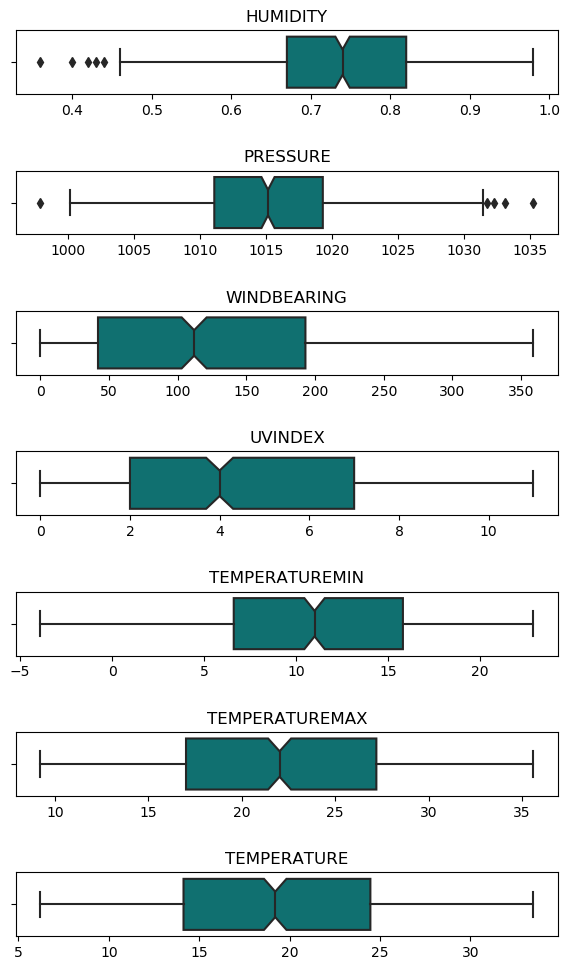

In [50]:
plt.figure(figsize=(7,12),dpi=100)
datos = ['humidity','pressure','windBearing','uvIndex','temperatureMin','temperatureMax','temperature']
nplots = len(datos)
outliers = {}
j = 1
db = dbDatos_con_bloque_daily.copy()
for variable in datos:
    plt.subplot(nplots,1,j)
    sb.boxplot(db[variable],notch=True,color='teal')
    plt.xlabel('')
    plt.title(variable.upper())
    q1 = estadisticos[variable]['25%']
    q3 = estadisticos[variable]['75%']
    iq = 1.5*(q3-q1)
    linf = q1-iq
    lsup = q3+iq
    atipicos = db[((db[variable]>=linf)&(db[variable]<=lsup)==False)]
    atipicos = atipicos[atipicos[variable].isna()==False]
    outliers.update({variable:atipicos[variable].values})   
    j+=1
plt.subplots_adjust(hspace=1.2)

In [51]:
outliers

{'humidity': array([0.43, 0.4 , 0.42, 0.36, 0.44]),
 'pressure': array([1031.79,  997.89, 1032.31, 1035.29, 1033.12]),
 'windBearing': array([], dtype=float64),
 'uvIndex': array([], dtype=float64),
 'temperatureMin': array([], dtype=float64),
 'temperatureMax': array([], dtype=float64),
 'temperature': array([], dtype=float64)}

#### COMENTARIOS SOBRE VALORES ATÍPICOS:
1. De las siete variables numéricas bajo estudio, sólo dos presentan valores atípicos: *humidity* y *pressure*
2. Los valores que toman los *outliers* representan menos del 1% de los datos de cada variable.
3. Los gráficos de caja de las variables que poseen *outliers*, evidencian valores atípicos cercanos a la frontera de valores típicos.

Ergo, al ser pocos y al estar cerca de los valores típicos, no tiene sentido eliminarlos, pues no generan peso sobre los valores de centralización ni en la dispersión.

### VALORES NULOS
#### CRITERIOS DE RELLENO:
1. Para la variable *time* se utiliza la variable *timeC* (tiempo del bloque *currently*), e.i., el tiempo cargado en la *url* de la consulta. Así, cuando el bloque *daily* no está presente y por lo tanto no se tienen los datos de dicho bloque como: *time*, se setea este último por el valor de *timeC*.  
2. Se utiliza el método de interpolación lineal para las variables numéricas continuas.
3. Para el caso de la variable categórica nominal *summary*, se utiliza una clasificación artesanal, puesto que, para este práctico, no corresponde utilizar métodos de aprendizaje automático. Dicha clasificación utiliza el método de componentes principales (*PCA*) sobre las variables numéricas continuas no temporales. Pasos:
  - Estandarizarización de variables. 
  - Generación de componentes principales, en este caso dos: **CP1** y **CP2**
  - Categorización de las nuevas variables. En este caso se utilizaron cinco rangos equiespaciados.
  - Confección de tabla cruzada: *summary* vs. variables nuevas categóricas.
  - Establecimiento manual de criterios de asignación. 

####  a) RELLENANDO VARIABLE TIME

In [52]:
# relleno de nulos en variable time del bloque daily
dbDatos.loc[dbDatos.time.isna(),'time'] = dbDatos.loc[dbDatos.time.isna()].timeC
dbDatos.loc[dbDatos.time.isna(),'time'] 

Series([], Name: time, dtype: float64)

In [53]:
# Se convierten valores de tiempo timestamp a datetime
dbDatos.loc[dbDatos.timeC.isna()==False,'timeC_dt'] = dbDatos[dbDatos.timeC.isna()==False].timeC.apply(lambda x: dt.datetime.fromtimestamp(int(x)))
dbDatos.loc[dbDatos.time.isna()==False,'time_dt'] = dbDatos[dbDatos.time.isna()==False].time.apply(lambda x: dt.datetime.fromtimestamp(int(x)))

In [54]:
# veamos cuantos nulos tenemos antes de interpolar
for columna in dbDatos.columns:
    print(columna+' nulos: ', len(dbDatos[dbDatos[columna].isna()]))

humidity nulos:  53
pressure nulos:  60
summary nulos:  49
temperature nulos:  11
temperatureMax nulos:  53
temperatureMin nulos:  53
time nulos:  0
timeC nulos:  0
uvIndex nulos:  49
windBearing nulos:  54
timeC_dt nulos:  0
time_dt nulos:  0


#### b) RELLENANDO VARIABLES NUMÉRICAS CONTINUAS

In [55]:
# relleno de variables numericas continuas por interpolacion
dbRelleno = dbDatos.interpolate(method ='linear', limit_direction ='forward',limit = 4)

In [56]:
# nulos despues de interpolar
for columna in dbDatos.columns:
    print(columna+' nulos: ', len(dbRelleno[dbRelleno[columna].isna()]))

humidity nulos:  0
pressure nulos:  0
summary nulos:  49
temperature nulos:  0
temperatureMax nulos:  0
temperatureMin nulos:  0
time nulos:  0
timeC nulos:  0
uvIndex nulos:  0
windBearing nulos:  0
timeC_dt nulos:  0
time_dt nulos:  0


#### c) RELLENANDO VARIABLE CATEGÓRICA *summary*

In [57]:
# variables a utilizar para PCA
columnas= ['humidity', 'pressure', 'temperature', 'temperatureMax','temperatureMin', 'uvIndex', 'windBearing']

In [58]:
# estandarizacion
variables_pca = dbRelleno.loc[:, columnas].values
target = dbRelleno.loc[:,['summary']].values
estadarizados = StandardScaler().fit_transform(variables_pca)

In [59]:
# reduccion de dimensionalidad a dos componentes principales
pca = PCA(n_components=2)
componentes_principales = pca.fit_transform(estadarizados)
dbPrincipales = pd.DataFrame(data=componentes_principales,columns = ['CP1', 'CP2'])

In [60]:
estadisticos = dbPrincipales.describe()
estadisticos

,CP1,CP2
count,7.310000e+02,7.310000e+02
mean,-2.976795e-17,5.437207e-17
std,1.936671e+00,1.128708e+00
min,-4.339297e+00,-3.083735e+00
25%,-1.529626e+00,-8.183818e-01
50%,-3.347663e-02,-8.360028e-02
75%,1.616133e+00,7.267466e-01
max,4.370804e+00,3.297411e+00


In [61]:
dbPrincipalesFinal = pd.concat([dbPrincipales, dbRelleno[['summary']]], axis = 1)
dbPrincipalesFinal.head()

,CP1,CP2,summary
0,-0.778196,0.363739,Mostly cloudy throughout the day.
1,-1.108751,1.964094,Clear throughout the day.
2,-1.997096,0.566976,Partly cloudy throughout the day.
3,-1.684769,0.395353,Clear throughout the day.
4,-3.129522,-0.273484,Partly cloudy throughout the day.


In [62]:
# categorizacion de las componentes principales a cinco rangos ordinales
categorias = {}
columnas = []
ncat = 5
for columna in estadisticos.columns:
    minimo = estadisticos[columna]['min']
    maximo = estadisticos[columna]['max']
    categorias.update({columna:[round(minimo+i*(maximo-minimo)/ncat,2) for i in np.arange(0,ncat+1,1)]})
    columnas.append(columna)

In [63]:
for columna in columnas:
    dbPrincipalesFinal[columna+'_cat'] = pd.cut(dbPrincipalesFinal[columna], bins=categorias[columna], include_lowest=True, labels=['cat5','cat4','cat3','cat2','cat1'] )

In [64]:
# generacion de tabla cruzada
cross = pd.crosstab(dbPrincipalesFinal.summary, [dbPrincipalesFinal.CP1_cat,dbPrincipalesFinal.CP2_cat])

In [65]:
#with pd.ExcelWriter('cross.xlsx') as writer:
#    cross.to_excel(writer)

In [66]:
# columna de categorias combinadas
dbPrincipalesFinal['id_dict'] = dbPrincipalesFinal.CP1_cat.astype(str)+'-'+dbPrincipalesFinal.CP2_cat.astype(str)

In [67]:
dic_summary={   1:'Clear throughout the day.'                  ,                           
                2:'Foggy in the afternoon.'                    ,                     
                3:'Foggy in the morning.'                      ,                      
                4:'Humid and mostly cloudy throughout the day.',                                    
                5:'Humid and overcast throughout the day.'     ,                                 
                6:'Humid and partly cloudy throughout the day.',                                
                7:'Humid throughout the day.'                  ,                            
                8:'Mostly cloudy throughout the day.'          ,                                  
                9:'Overcast throughout the day.'               ,                                
                10:'Partly cloudy throughout the day.'         ,                                                
                11:'Windy in the afternoon.'                   ,                       
                12:'Windy in the evening.'                      
            }        


In [68]:
asignacion ={   'cat5-cat5':4,
                'cat5-cat4':5,
                'cat5-cat3':6,
                'cat5-cat2':1,
                'cat5-cat1':1,
                'cat4-cat5':4,
                'cat4-cat4':7,
                'cat4-cat3':8,
                'cat4-cat2':10,
                'cat4-cat1':10,
                'cat3-cat5':9,
                'cat3-cat4':9,
                'cat3-cat3':12,
                'cat3-cat2':10,
                'cat3-cat1':10,
                'cat2-cat5':11,
                'cat2-cat4':8,
                'cat2-cat3':10,
                'cat2-cat2':1,
                'cat2-cat1':3,
                'cat1-cat5':2,
                'cat1-cat4':9,
                'cat1-cat3':8,
                'cat1-cat2':10,
                'cat1-cat1':2
            }

In [69]:
# asignacion de summary segun combinacion de categorias
dbPrincipalesFinal.loc[dbPrincipalesFinal.summary.isna(),'summary'] = dbPrincipalesFinal[dbPrincipalesFinal.summary.isna()].id_dict.map(asignacion)

In [70]:
dbPrincipalesFinal.loc[dbPrincipalesFinal.summary.isin(asignacion.values()),'summary'] = dbPrincipalesFinal[dbPrincipalesFinal.summary.isin(asignacion.values())].summary.map(dic_summary)

In [71]:
# indices de valores nulos de summary
nulos_summary=dbRelleno[dbRelleno.summary.isna()].index
dbRelleno.loc[nulos_summary].head()

,humidity,pressure,summary,temperature,temperatureMax,temperatureMin,time,timeC,uvIndex,windBearing,timeC_dt,time_dt
46,0.765000,1013.930,NaN,25.80,27.905,17.105,1.424099e+09,1.424099e+09,6.5,67.0,2015-02-16 12:00:00,2015-02-16 12:00:00
101,0.842500,1016.684,NaN,22.42,23.450,17.160,1.428851e+09,1.428851e+09,4.0,95.0,2015-04-12 12:00:00,2015-04-12 12:00:00
102,0.855000,1015.848,NaN,29.62,23.500,17.310,1.428937e+09,1.428937e+09,4.0,96.0,2015-04-13 12:00:00,2015-04-13 12:00:00
122,0.750000,1010.885,NaN,15.76,18.655,6.400,1.430665e+09,1.430665e+09,3.5,267.0,2015-05-03 12:00:00,2015-05-03 12:00:00
149,0.836667,1015.910,NaN,14.41,18.410,9.010,1.432998e+09,1.432998e+09,2.0,144.0,2015-05-30 12:00:00,2015-05-30 12:00:00


In [72]:
# relleno de variable summary
dbRelleno.loc[nulos_summary,'summary'] = dbPrincipalesFinal.loc[nulos_summary].summary

In [73]:
dbRelleno.loc[nulos_summary,'summary']

46               Mostly cloudy throughout the day.
101                   Overcast throughout the day.
102                      Humid throughout the day.
122              Partly cloudy throughout the day.
149              Mostly cloudy throughout the day.
150              Partly cloudy throughout the day.
180              Mostly cloudy throughout the day.
189              Mostly cloudy throughout the day.
215              Partly cloudy throughout the day.
226              Mostly cloudy throughout the day.
227              Partly cloudy throughout the day.
245                      Clear throughout the day.
293              Partly cloudy throughout the day.
344              Mostly cloudy throughout the day.
349              Mostly cloudy throughout the day.
366                      Humid throughout the day.
389              Mostly cloudy throughout the day.
398              Mostly cloudy throughout the day.
400    Humid and partly cloudy throughout the day.
405    Humid and partly cloudy 

In [74]:
# corroboramos que todos los indices que eran nulos ya no lo son
dbRelleno.loc[nulos_summary]

,humidity,pressure,summary,temperature,temperatureMax,temperatureMin,time,timeC,uvIndex,windBearing,timeC_dt,time_dt
46,0.765000,1013.930000,Mostly cloudy throughout the day.,25.800,27.905000,17.105000,1.424099e+09,1.424099e+09,6.500000,67.000000,2015-02-16 12:00:00,2015-02-16 12:00:00
101,0.842500,1016.684000,Overcast throughout the day.,22.420,23.450000,17.160000,1.428851e+09,1.428851e+09,4.000000,95.000000,2015-04-12 12:00:00,2015-04-12 12:00:00
102,0.855000,1015.848000,Humid throughout the day.,29.620,23.500000,17.310000,1.428937e+09,1.428937e+09,4.000000,96.000000,2015-04-13 12:00:00,2015-04-13 12:00:00
122,0.750000,1010.885000,Partly cloudy throughout the day.,15.760,18.655000,6.400000,1.430665e+09,1.430665e+09,3.500000,267.000000,2015-05-03 12:00:00,2015-05-03 12:00:00
149,0.836667,1015.910000,Mostly cloudy throughout the day.,14.410,18.410000,9.010000,1.432998e+09,1.432998e+09,2.000000,144.000000,2015-05-30 12:00:00,2015-05-30 12:00:00
150,0.843333,1016.530000,Partly cloudy throughout the day.,17.310,19.010000,7.810000,1.433084e+09,1.433084e+09,2.000000,248.000000,2015-05-31 12:00:00,2015-05-31 12:00:00
180,0.810000,1015.650000,Mostly cloudy throughout the day.,14.410,17.410000,8.505000,1.435676e+09,1.435676e+09,2.000000,171.000000,2015-06-30 12:00:00,2015-06-30 12:00:00
189,0.810000,1016.215000,Mostly cloudy throughout the day.,11.610,15.810000,6.100000,1.436454e+09,1.436454e+09,2.000000,87.000000,2015-07-09 12:00:00,2015-07-09 12:00:00
215,0.745000,1013.350000,Partly cloudy throughout the day.,14.810,18.210000,10.105000,1.438700e+09,1.438700e+09,2.000000,113.500000,2015-08-04 12:00:00,2015-08-04 12:00:00
226,0.910000,1017.926667,Mostly cloudy throughout the day.,12.710,11.210000,5.333333,1.439651e+09,1.439651e+09,3.000000,254.000000,2015-08-15 12:00:00,2015-08-15 12:00:00


In [75]:
for columna in dbDatos.columns:
    print(columna+' nulos: ', len(dbRelleno[dbRelleno[columna].isna()]))

humidity nulos:  0
pressure nulos:  0
summary nulos:  0
temperature nulos:  0
temperatureMax nulos:  0
temperatureMin nulos:  0
time nulos:  0
timeC nulos:  0
uvIndex nulos:  0
windBearing nulos:  0
timeC_dt nulos:  0
time_dt nulos:  0


# Parte 4 (Obtener datos desde Base de Datos)

1) Siguiendo como ejemplo el notebook MySQL Example conectar a la base de datos provista y obtener los registros de la tabla forecastHistory

2) Analizar los json guardados en el campo data de esta tabla y generar un dataset con los campos (time, summary, temperature, humidity, pressure, windBearing, uvIndex, temperatureMin, temperatureMax)

3) Analizar y dar valor a valores nulos/outliers

In [76]:
mydb = mysql.connector.connect(
  host="remotemysql.com",
  user="sKScuEZYf1",
  passwd="TCUlQOUQhR",
  database="sKScuEZYf1"
)

selectCursor = mydb.cursor()

selectCursor.execute("SELECT * FROM forecastHistory")

In [77]:
result = selectCursor.fetchall()

In [78]:
for x in result:
    print(x)

(1, "{'latitude': -34.5934, 'longitude': -60.9462, 'timezone': 'America/Argentina/Buenos_Aires', 'currently': {'time': 1483272000}, 'offset': -3}")
(2, "{'latitude': -34.5934, 'longitude': -60.9462, 'timezone': 'America/Argentina/Buenos_Aires', 'currently': {'time': 1483358400, 'summary': 'Clear', 'icon': 'clear-day', 'precipType': 'rain', 'temperature': 22.71, 'apparentTemperature': 22.88, 'dewPoint': 17.09, 'humidity': 0.71, 'pressure': 1013.09, 'windSpeed': 12.96, 'windBearing': 71, 'cloudCover': 0.13, 'uvIndex': 3}, 'daily': {'data': [{'time': 1483326000, 'summary': 'Partly cloudy starting in the afternoon, continuing until evening.', 'icon': 'partly-cloudy-day', 'sunriseTime': 1483347417, 'sunsetTime': 1483399282, 'moonPhase': 0.14, 'precipType': 'rain', 'dewPoint': 17.99, 'humidity': 0.68, 'pressure': 1010.22, 'windSpeed': 11.09, 'windBearing': 51, 'uvIndex': 9, 'uvIndexTime': 1483369200, 'temperatureMin': 17.11, 'temperatureMinTime': 1483347600, 'temperatureMax': 30.62, 'tempera

In [79]:
mydb.close()

In [80]:
len(result)

869

Se observa que la base de datos en remotemysql cuenta con 869 registros.

In [81]:
type(result)

list

In [82]:
result[0][1]

"{'latitude': -34.5934, 'longitude': -60.9462, 'timezone': 'America/Argentina/Buenos_Aires', 'currently': {'time': 1483272000}, 'offset': -3}"

In [83]:
result[1][1]

"{'latitude': -34.5934, 'longitude': -60.9462, 'timezone': 'America/Argentina/Buenos_Aires', 'currently': {'time': 1483358400, 'summary': 'Clear', 'icon': 'clear-day', 'precipType': 'rain', 'temperature': 22.71, 'apparentTemperature': 22.88, 'dewPoint': 17.09, 'humidity': 0.71, 'pressure': 1013.09, 'windSpeed': 12.96, 'windBearing': 71, 'cloudCover': 0.13, 'uvIndex': 3}, 'daily': {'data': [{'time': 1483326000, 'summary': 'Partly cloudy starting in the afternoon, continuing until evening.', 'icon': 'partly-cloudy-day', 'sunriseTime': 1483347417, 'sunsetTime': 1483399282, 'moonPhase': 0.14, 'precipType': 'rain', 'dewPoint': 17.99, 'humidity': 0.68, 'pressure': 1010.22, 'windSpeed': 11.09, 'windBearing': 51, 'uvIndex': 9, 'uvIndexTime': 1483369200, 'temperatureMin': 17.11, 'temperatureMinTime': 1483347600, 'temperatureMax': 30.62, 'temperatureMaxTime': 1483380000, 'apparentTemperatureMin': 17.11, 'apparentTemperatureMinTime': 1483347600, 'apparentTemperatureMax': 32.65, 'apparentTemperatu

Es posible observar que los valores extraídos se encuentran en formato de lista y además, que existen filas con mayor y menor cantidad de datos.
La lista se encuentra compuesta en cada fila por un índice numeral entero y por un json en formato texto. Para esto
A continuación, se extraerá de la lista "result", los datos de la segunda columna de la lista y se convertira el texto de cada fila a formato json.

In [84]:
json_temp=[];
for x in range(len(result)):
            json_temp.append(yaml.load(result[x][1], Loader=yaml.FullLoader))
            print(result[x][1])

{'latitude': -34.5934, 'longitude': -60.9462, 'timezone': 'America/Argentina/Buenos_Aires', 'currently': {'time': 1483272000}, 'offset': -3}
{'latitude': -34.5934, 'longitude': -60.9462, 'timezone': 'America/Argentina/Buenos_Aires', 'currently': {'time': 1483358400, 'summary': 'Clear', 'icon': 'clear-day', 'precipType': 'rain', 'temperature': 22.71, 'apparentTemperature': 22.88, 'dewPoint': 17.09, 'humidity': 0.71, 'pressure': 1013.09, 'windSpeed': 12.96, 'windBearing': 71, 'cloudCover': 0.13, 'uvIndex': 3}, 'daily': {'data': [{'time': 1483326000, 'summary': 'Partly cloudy starting in the afternoon, continuing until evening.', 'icon': 'partly-cloudy-day', 'sunriseTime': 1483347417, 'sunsetTime': 1483399282, 'moonPhase': 0.14, 'precipType': 'rain', 'dewPoint': 17.99, 'humidity': 0.68, 'pressure': 1010.22, 'windSpeed': 11.09, 'windBearing': 51, 'uvIndex': 9, 'uvIndexTime': 1483369200, 'temperatureMin': 17.11, 'temperatureMinTime': 1483347600, 'temperatureMax': 30.62, 'temperatureMaxTime'

{'latitude': -34.5934, 'longitude': -60.9462, 'timezone': 'America/Argentina/Buenos_Aires', 'currently': {'time': 1485000000, 'summary': 'Partly Cloudy', 'icon': 'partly-cloudy-day', 'precipType': 'rain', 'temperature': 23.6, 'apparentTemperature': 23.93, 'dewPoint': 18.59, 'humidity': 0.74, 'pressure': 1015.09, 'windSpeed': 18.33, 'windBearing': 0, 'cloudCover': 0.5, 'uvIndex': 2}, 'daily': {'data': [{'time': 1484967600, 'summary': 'Partly cloudy in the morning.', 'icon': 'partly-cloudy-day', 'sunriseTime': 1484990069, 'sunsetTime': 1485040691, 'moonPhase': 0.8, 'precipType': 'rain', 'dewPoint': 20.16, 'humidity': 0.71, 'pressure': 1013.14, 'windSpeed': 19.12, 'windBearing': 8, 'uvIndex': 10, 'uvIndexTime': 1485010800, 'temperatureMin': 20.51, 'temperatureMinTime': 1484989200, 'temperatureMax': 32.82, 'temperatureMaxTime': 1485021600, 'apparentTemperatureMin': 20.91, 'apparentTemperatureMinTime': 1484989200, 'apparentTemperatureMax': 36.46, 'apparentTemperatureMaxTime': 1485032400}]},

{'latitude': -34.5934, 'longitude': -60.9462, 'timezone': 'America/Argentina/Buenos_Aires', 'currently': {'time': 1487160000, 'summary': 'Clear', 'icon': 'clear-day', 'precipType': 'rain', 'temperature': 22.61, 'apparentTemperature': 23.22, 'dewPoint': 20.5, 'humidity': 0.88, 'pressure': 1012.91, 'windSpeed': 11.15, 'windBearing': 270}, 'daily': {'data': [{'time': 1487127600, 'summary': 'Partly cloudy starting in the afternoon, continuing until evening.', 'icon': 'partly-cloudy-day', 'sunriseTime': 1487151600, 'sunsetTime': 1487199515, 'moonPhase': 0.65, 'precipType': 'rain', 'dewPoint': 19.16, 'humidity': 0.77, 'pressure': 1011.6, 'windSpeed': 5.89, 'windBearing': 268, 'uvIndex': 7, 'uvIndexTime': 1487170800, 'temperatureMin': 19.21, 'temperatureMinTime': 1487127600, 'temperatureMax': 30.22, 'temperatureMaxTime': 1487181600, 'apparentTemperatureMin': 19.61, 'apparentTemperatureMinTime': 1487127600, 'apparentTemperatureMax': 31.73, 'apparentTemperatureMaxTime': 1487181600}]}, 'offset':

{'latitude': -34.5934, 'longitude': -60.9462, 'timezone': 'America/Argentina/Buenos_Aires', 'currently': {'time': 1488974400, 'summary': 'Overcast', 'icon': 'cloudy', 'precipType': 'rain', 'temperature': 19.11, 'apparentTemperature': 19.48, 'dewPoint': 17.8, 'humidity': 0.92, 'pressure': 1009.19, 'windSpeed': 22.34, 'windBearing': 0, 'cloudCover': 1, 'uvIndex': 1}, 'daily': {'data': [{'time': 1488942000, 'summary': 'Mostly cloudy until evening and breezy starting in the evening.', 'icon': 'wind', 'sunriseTime': 1488967134, 'sunsetTime': 1489012367, 'moonPhase': 0.37, 'precipType': 'rain', 'dewPoint': 19.77, 'humidity': 0.85, 'pressure': 1006.56, 'windSpeed': 23.75, 'windBearing': 24, 'cloudCover': 0.69, 'uvIndex': 5, 'uvIndexTime': 1488985200, 'temperatureMin': 18.01, 'temperatureMinTime': 1488963600, 'temperatureMax': 28.21, 'temperatureMaxTime': 1488996000, 'apparentTemperatureMin': 18.3, 'apparentTemperatureMinTime': 1488963600, 'apparentTemperatureMax': 30.95, 'apparentTemperatureM

{'latitude': -34.5934, 'longitude': -60.9462, 'timezone': 'America/Argentina/Buenos_Aires', 'currently': {'time': 1491393600, 'summary': 'Clear', 'icon': 'clear-day', 'precipType': 'rain', 'temperature': 17.01, 'apparentTemperature': 17.01, 'dewPoint': 9.4, 'humidity': 0.61, 'pressure': 1013.8, 'windSpeed': 14.77, 'windBearing': 180}, 'daily': {'data': [{'time': 1491361200, 'summary': 'Clear throughout the day.', 'icon': 'clear-day', 'sunriseTime': 1491387648, 'sunsetTime': 1491429242, 'moonPhase': 0.32, 'precipType': 'rain', 'dewPoint': 11.01, 'humidity': 0.59, 'pressure': 1012.6, 'windSpeed': 12.87, 'windBearing': 221, 'uvIndex': 6, 'uvIndexTime': 1491404400, 'temperatureMin': 17.01, 'temperatureMinTime': 1491393600, 'temperatureMax': 25.32, 'temperatureMaxTime': 1491415200, 'apparentTemperatureMin': 17.01, 'apparentTemperatureMinTime': 1491393600, 'apparentTemperatureMax': 25.32, 'apparentTemperatureMaxTime': 1491415200}]}, 'offset': -3}
{'latitude': -34.5934, 'longitude': -60.9462,

{'latitude': -34.5934, 'longitude': -60.9462, 'timezone': 'America/Argentina/Buenos_Aires', 'currently': {'time': 1493899200, 'summary': 'Clear', 'icon': 'clear-day', 'precipType': 'rain', 'temperature': 13.61, 'apparentTemperature': 13.61, 'dewPoint': 12.09, 'humidity': 0.91, 'pressure': 1016.29, 'windSpeed': 11.15, 'windBearing': 50}, 'daily': {'data': [{'time': 1493866800, 'summary': 'Partly cloudy starting in the afternoon.', 'icon': 'partly-cloudy-night', 'sunriseTime': 1493894612, 'sunsetTime': 1493932801, 'moonPhase': 0.3, 'precipType': 'rain', 'dewPoint': 14.53, 'humidity': 0.79, 'pressure': 1015.11, 'windSpeed': 10.17, 'windBearing': 18, 'uvIndex': 4, 'uvIndexTime': 1493910000, 'temperatureMin': 12.21, 'temperatureMinTime': 1493888400, 'temperatureMax': 26.31, 'temperatureMaxTime': 1493920800, 'apparentTemperatureMin': 12.21, 'apparentTemperatureMinTime': 1493888400, 'apparentTemperatureMax': 26.41, 'apparentTemperatureMaxTime': 1493920800}]}, 'offset': -3}
{'latitude': -34.59

{'latitude': -34.5934, 'longitude': -60.9462, 'timezone': 'America/Argentina/Buenos_Aires', 'currently': {'time': 1496750400, 'summary': 'Partly Cloudy', 'icon': 'partly-cloudy-day', 'precipType': 'rain', 'temperature': 2.01, 'apparentTemperature': 0.53, 'dewPoint': 0.71, 'humidity': 0.91, 'pressure': 1019.49, 'windSpeed': 5.41, 'windBearing': 320, 'cloudCover': 0.25, 'uvIndex': 0}, 'daily': {'data': [{'time': 1496718000, 'summary': 'Partly cloudy in the morning.', 'icon': 'partly-cloudy-night', 'sunriseTime': 1496747194, 'sunsetTime': 1496782889, 'moonPhase': 0.41, 'precipType': 'rain', 'dewPoint': 2.19, 'humidity': 0.74, 'pressure': 1018.13, 'windSpeed': 5.21, 'windBearing': 318, 'uvIndex': 2, 'uvIndexTime': 1496761200, 'temperatureMin': 1, 'temperatureMinTime': 1496739600, 'temperatureMax': 15.81, 'temperatureMaxTime': 1496772000, 'apparentTemperatureMin': 0.53, 'apparentTemperatureMinTime': 1496750400, 'apparentTemperatureMax': 15.81, 'apparentTemperatureMaxTime': 1496772000}]}, 'o

{'latitude': -34.5934, 'longitude': -60.9462, 'timezone': 'America/Argentina/Buenos_Aires', 'currently': {'time': 1503403200, 'summary': 'Windy and Mostly Cloudy', 'icon': 'wind', 'precipType': 'rain', 'temperature': 9.32, 'apparentTemperature': 4.74, 'dewPoint': 2.5, 'humidity': 0.62, 'pressure': 1013.5, 'windSpeed': 46.43, 'windBearing': 20, 'cloudCover': 0.75, 'uvIndex': 0}, 'daily': {'data': [{'time': 1503370800, 'summary': 'Windy until afternoon and mostly cloudy throughout the day.', 'icon': 'wind', 'sunriseTime': 1503398182, 'sunsetTime': 1503437985, 'moonPhase': 0.03, 'precipType': 'rain', 'dewPoint': 4.1, 'humidity': 0.58, 'pressure': 1012.08, 'windSpeed': 36.89, 'windBearing': 16, 'cloudCover': 0.53, 'uvIndex': 3, 'uvIndexTime': 1503414000, 'temperatureMin': 9.01, 'temperatureMinTime': 1503392400, 'temperatureMax': 18.11, 'temperatureMaxTime': 1503424800, 'apparentTemperatureMin': 4.63, 'apparentTemperatureMinTime': 1503392400, 'apparentTemperatureMax': 18.11, 'apparentTemper

{'latitude': -34.5934, 'longitude': -60.9462, 'timezone': 'America/Argentina/Buenos_Aires', 'currently': {'time': 1507550400, 'summary': 'Clear', 'icon': 'clear-day', 'precipType': 'rain', 'temperature': 13.61, 'apparentTemperature': 13.61, 'dewPoint': 10.99, 'humidity': 0.84, 'pressure': 1013.29, 'windSpeed': 20.54, 'windBearing': 230}, 'daily': {'data': [{'time': 1507518000, 'summary': 'Clear throughout the day.', 'icon': 'clear-day', 'sunriseTime': 1507541397, 'sunsetTime': 1507587248, 'moonPhase': 0.64, 'precipType': 'rain', 'dewPoint': 8.96, 'humidity': 0.68, 'pressure': 1012.65, 'windSpeed': 15.84, 'windBearing': 233, 'uvIndex': 8, 'uvIndexTime': 1507561200, 'temperatureMin': 11.11, 'temperatureMinTime': 1507539600, 'temperatureMax': 21.71, 'temperatureMaxTime': 1507572000, 'apparentTemperatureMin': 11.11, 'apparentTemperatureMinTime': 1507539600, 'apparentTemperatureMax': 21.71, 'apparentTemperatureMaxTime': 1507572000}]}, 'offset': -3}
{'latitude': -34.5934, 'longitude': -60.94

{'latitude': -34.5934, 'longitude': -60.9462, 'timezone': 'America/Argentina/Buenos_Aires', 'currently': {'time': 1510920000, 'summary': 'Mostly Cloudy', 'icon': 'partly-cloudy-day', 'precipType': 'rain', 'temperature': 18.71, 'apparentTemperature': 18.71, 'dewPoint': 8.1, 'humidity': 0.5, 'pressure': 1007.31, 'windSpeed': 12.96, 'windBearing': 290, 'cloudCover': 0.63, 'uvIndex': 3}, 'daily': {'data': [{'time': 1510887600, 'summary': 'Partly cloudy until afternoon.', 'icon': 'partly-cloudy-day', 'sunriseTime': 1510908631, 'sunsetTime': 1510959002, 'moonPhase': 0.97, 'precipType': 'rain', 'dewPoint': 6.17, 'humidity': 0.51, 'pressure': 1007.94, 'windSpeed': 10.93, 'windBearing': 288, 'uvIndex': 7, 'uvIndexTime': 1510941600, 'temperatureMin': 11.51, 'temperatureMinTime': 1510909200, 'temperatureMax': 24.11, 'temperatureMaxTime': 1510941600, 'apparentTemperatureMin': 11.51, 'apparentTemperatureMinTime': 1510909200, 'apparentTemperatureMax': 24.11, 'apparentTemperatureMaxTime': 1510941600}

{'latitude': -34.5934, 'longitude': -60.9462, 'timezone': 'America/Argentina/Buenos_Aires', 'currently': {'time': 1513425600, 'summary': 'Breezy and Partly Cloudy', 'icon': 'wind', 'precipType': 'rain', 'temperature': 29.22, 'apparentTemperature': 30.09, 'dewPoint': 18.07, 'humidity': 0.51, 'pressure': 1002.4, 'windSpeed': 37.08, 'windBearing': 0, 'cloudCover': 0.25, 'uvIndex': 3}, 'daily': {'data': [{'time': 1513393200, 'summary': 'Windy until evening and overcast starting in the evening.', 'icon': 'wind', 'sunriseTime': 1513414027, 'sunsetTime': 1513466091, 'moonPhase': 0.95, 'precipType': 'rain', 'dewPoint': 17.99, 'humidity': 0.57, 'pressure': 999.6, 'windSpeed': 34.99, 'windBearing': 14, 'cloudCover': 0.41, 'uvIndex': 7, 'uvIndexTime': 1513436400, 'temperatureMin': 20.51, 'temperatureMinTime': 1513414800, 'temperatureMax': 33.71, 'temperatureMaxTime': 1513447200, 'apparentTemperatureMin': 20.78, 'apparentTemperatureMinTime': 1513414800, 'apparentTemperatureMax': 36.31, 'apparentTe

{'latitude': -34.5934, 'longitude': -60.9462, 'timezone': 'America/Argentina/Buenos_Aires', 'currently': {'time': 1515240000, 'summary': 'Clear', 'icon': 'clear-day', 'precipType': 'rain', 'temperature': 19.21, 'apparentTemperature': 19.21, 'dewPoint': 10.8, 'humidity': 0.58, 'pressure': 1018.8, 'windSpeed': 22.34, 'windBearing': 50}, 'daily': {'data': [{'time': 1515207600, 'summary': 'Partly cloudy in the evening.', 'icon': 'partly-cloudy-day', 'sunriseTime': 1515229200, 'sunsetTime': 1515280897, 'moonPhase': 0.67, 'precipType': 'rain', 'dewPoint': 10.23, 'humidity': 0.59, 'pressure': 1016.17, 'windSpeed': 8.61, 'windBearing': 53, 'uvIndex': 11, 'uvIndexTime': 1515250800, 'temperatureMin': 13.71, 'temperatureMinTime': 1515229200, 'temperatureMax': 27.31, 'temperatureMaxTime': 1515261600, 'apparentTemperatureMin': 13.71, 'apparentTemperatureMinTime': 1515229200, 'apparentTemperatureMax': 27.31, 'apparentTemperatureMaxTime': 1515261600}]}, 'offset': -3}
{'latitude': -34.5934, 'longitude

{'latitude': -34.5934, 'longitude': -60.9462, 'timezone': 'America/Argentina/Buenos_Aires', 'currently': {'time': 1517572800, 'summary': 'Clear', 'icon': 'clear-day', 'precipType': 'rain', 'temperature': 26.02, 'apparentTemperature': 26.39, 'dewPoint': 19.08, 'humidity': 0.66, 'pressure': 1013.59, 'windSpeed': 5.41, 'windBearing': 140}, 'daily': {'data': [{'time': 1517540400, 'summary': 'Clear throughout the day.', 'icon': 'clear-day', 'sunriseTime': 1517563599, 'sunsetTime': 1517613053, 'moonPhase': 0.58, 'precipType': 'rain', 'dewPoint': 17.72, 'humidity': 0.63, 'pressure': 1012.02, 'windSpeed': 7.39, 'windBearing': 124, 'uvIndex': 10, 'uvIndexTime': 1517583600, 'temperatureMin': 18.21, 'temperatureMinTime': 1517562000, 'temperatureMax': 34.32, 'temperatureMaxTime': 1517594400, 'apparentTemperatureMin': 18.47, 'apparentTemperatureMinTime': 1517562000, 'apparentTemperatureMax': 35.36, 'apparentTemperatureMaxTime': 1517594400}]}, 'offset': -3}
{'latitude': -34.5934, 'longitude': -60.94

{'latitude': -34.5934, 'longitude': -60.9462, 'timezone': 'America/Argentina/Buenos_Aires', 'currently': {'time': 1520856000, 'summary': 'Clear', 'icon': 'clear-day', 'precipType': 'rain', 'temperature': 12.21, 'apparentTemperature': 12.21, 'dewPoint': 8.41, 'humidity': 0.78, 'pressure': 1013.41, 'windSpeed': 7.55, 'windBearing': 0}, 'daily': {'data': [{'time': 1520823600, 'summary': 'Breezy starting in the afternoon, continuing until evening, and partly cloudy starting in the evening.', 'icon': 'wind', 'sunriseTime': 1520848919, 'sunsetTime': 1520893660, 'moonPhase': 0.84, 'precipType': 'rain', 'dewPoint': 9.12, 'humidity': 0.67, 'pressure': 1010.86, 'windSpeed': 13.2, 'windBearing': 358, 'uvIndex': 7, 'uvIndexTime': 1520866800, 'temperatureMin': 8.42, 'temperatureMinTime': 1520834400, 'temperatureMax': 27.62, 'temperatureMaxTime': 1520877600, 'apparentTemperatureMin': 7.84, 'apparentTemperatureMinTime': 1520834400, 'apparentTemperatureMax': 27.62, 'apparentTemperatureMaxTime': 152087

{'latitude': -34.5934, 'longitude': -60.9462, 'timezone': 'America/Argentina/Buenos_Aires', 'currently': {'time': 1523793600, 'summary': 'Clear', 'icon': 'clear-day', 'precipType': 'rain', 'temperature': 15.01, 'apparentTemperature': 15.01, 'dewPoint': 11.69, 'humidity': 0.81, 'pressure': 1026.09, 'windSpeed': 24.12, 'windBearing': 50}, 'daily': {'data': [{'time': 1523761200, 'summary': 'Breezy in the afternoon.', 'icon': 'wind', 'sunriseTime': 1523788100, 'sunsetTime': 1523828479, 'moonPhase': 0.98, 'precipType': 'rain', 'dewPoint': 12.42, 'humidity': 0.7, 'pressure': 1024.8, 'windSpeed': 18.3, 'windBearing': 45, 'uvIndex': 5, 'uvIndexTime': 1523804400, 'temperatureMin': 12.51, 'temperatureMinTime': 1523782800, 'temperatureMax': 26.6, 'temperatureMaxTime': 1523815200, 'apparentTemperatureMin': 12.51, 'apparentTemperatureMinTime': 1523782800, 'apparentTemperatureMax': 26.6, 'apparentTemperatureMaxTime': 1523815200}]}, 'offset': -3}
{'latitude': -34.5934, 'longitude': -60.9462, 'timezon

{'latitude': -34.5934, 'longitude': -60.9462, 'timezone': 'America/Argentina/Buenos_Aires', 'currently': {'time': 1528718400}, 'offset': -3}
{'latitude': -34.5934, 'longitude': -60.9462, 'timezone': 'America/Argentina/Buenos_Aires', 'currently': {'time': 1528804800}, 'offset': -3}
{'latitude': -34.5934, 'longitude': -60.9462, 'timezone': 'America/Argentina/Buenos_Aires', 'currently': {'time': 1528891200}, 'offset': -3}
{'latitude': -34.5934, 'longitude': -60.9462, 'timezone': 'America/Argentina/Buenos_Aires', 'currently': {'time': 1528977600}, 'offset': -3}
{'latitude': -34.5934, 'longitude': -60.9462, 'timezone': 'America/Argentina/Buenos_Aires', 'currently': {'time': 1529064000}, 'offset': -3}
{'latitude': -34.5934, 'longitude': -60.9462, 'timezone': 'America/Argentina/Buenos_Aires', 'currently': {'time': 1529150400}, 'offset': -3}
{'latitude': -34.5934, 'longitude': -60.9462, 'timezone': 'America/Argentina/Buenos_Aires', 'currently': {'time': 1529236800}, 'offset': -3}
{'latitude': 

{'latitude': -34.5934, 'longitude': -60.9462, 'timezone': 'America/Argentina/Buenos_Aires', 'currently': {'time': 1515240000, 'summary': 'Clear', 'icon': 'clear-day', 'precipType': 'rain', 'temperature': 19.21, 'apparentTemperature': 19.21, 'dewPoint': 10.81, 'humidity': 0.58, 'pressure': 1018.8, 'windSpeed': 22.34, 'windBearing': 50}, 'daily': {'data': [{'time': 1515207600, 'summary': 'Clear throughout the day.', 'icon': 'clear-day', 'sunriseTime': 1515229201, 'sunsetTime': 1515280898, 'moonPhase': 0.68, 'dewPoint': 10.59, 'humidity': 0.61, 'pressure': 1016.07, 'windSpeed': 13.36, 'windBearing': 45, 'uvIndex': 11, 'uvIndexTime': 1515250800, 'temperatureMin': 13.71, 'temperatureMinTime': 1515229200, 'temperatureMax': 27.31, 'temperatureMaxTime': 1515261600, 'apparentTemperatureMin': 13.71, 'apparentTemperatureMinTime': 1515229200, 'apparentTemperatureMax': 27.31, 'apparentTemperatureMaxTime': 1515261600}]}, 'offset': -3}
{'latitude': -34.5934, 'longitude': -60.9462, 'timezone': 'Americ

{'latitude': -34.5934, 'longitude': -60.9462, 'timezone': 'America/Argentina/Buenos_Aires', 'currently': {'time': 1519560000, 'summary': 'Mostly Cloudy', 'icon': 'partly-cloudy-day', 'precipType': 'rain', 'temperature': 18.81, 'apparentTemperature': 18.81, 'dewPoint': 14.9, 'humidity': 0.78, 'pressure': 1019.49, 'windSpeed': 16.56, 'windBearing': 110, 'cloudCover': 0.75, 'uvIndex': 2}, 'daily': {'data': [{'time': 1519527600, 'summary': 'Overcast throughout the day.', 'icon': 'clear-day', 'sunriseTime': 1519552150, 'sunsetTime': 1519598841, 'moonPhase': 0.35, 'dewPoint': 15.33, 'humidity': 0.71, 'pressure': 1017.71, 'windSpeed': 10.32, 'windBearing': 88, 'uvIndex': 5, 'uvIndexTime': 1519570800, 'temperatureMin': 15.21, 'temperatureMinTime': 1519549200, 'temperatureMax': 27.41, 'temperatureMaxTime': 1519581600, 'apparentTemperatureMin': 15.21, 'apparentTemperatureMinTime': 1519549200, 'apparentTemperatureMax': 27.9, 'apparentTemperatureMaxTime': 1519581600}]}, 'offset': -3}
{'latitude': 

A continuación, se lee de cada json en cada fila del vector "json_temp" las variables que nos interesa guardar en un nuevo dataframe. Además, si no existe medición para un día dado, se coloca un valor NaN.

In [85]:
json_2 = [];
df_data = pd.DataFrame(columns = ['time', 'summary', 'temperature', 'humidity', 'pressure', 'windBearing', 'uvIndex', 'temperatureMin', 'temperatureMax'])
for x in range(len(json_temp)):
    time = json_temp[x].get('currently').get('time')
    json_temp2 = json_temp[x]
    if 'daily' in json_temp2.keys():
        temperature = json_temp[x].get('currently').get('temperature')
        summary = json_temp[x].get('daily').get('data')[0]['summary']
        humidity = json_temp[x].get('currently').get('humidity')
        pressure = json_temp[x].get('currently').get('pressure')
        windBearing = json_temp[x].get('currently').get('windBearing')
        uvIndex = json_temp[x].get('daily').get('data')[0]['uvIndex']
        temperatureMin = json_temp[x].get('daily').get('data')[0]['temperatureMin']
        temperatureMax = json_temp[x].get('daily').get('data')[0]['temperatureMax']
    else:
        temperature = np.nan
        summary = np.nan
        humidity = np.nan
        pressure = np.nan
        windBearing = np.nan
        uvIndex = np.nan
        temperatureMin = np.nan
        temperatureMax = np.nan
        
    json_2.append({'time': time,
                   'summary': summary,
                   'temperature': temperature,
                   'humidity': humidity,
                   'pressure': pressure,
                   'windBearing': windBearing,
                   'uvIndex': uvIndex,
                   'temperatureMin': temperatureMin,
                   'temperatureMax': temperatureMax})

In [86]:
df_data = pd.DataFrame(json_2)

A continuación agregamos una columna "dia_dt" con el tiempo en formato año-mes-día.

In [87]:
df_data['dia_dt'] = df_data.time.apply(lambda x: dt.datetime.fromtimestamp(int(x)))

In [88]:
df_data.shape

(869, 10)

Además de los encabezados de cada columna, hay 868 datos en cada una. Sin embargo, a partir del 731 se empiezan a repetir.

In [89]:
df_data.head(750)

,humidity,pressure,summary,temperature,temperatureMax,temperatureMin,time,uvIndex,windBearing,dia_dt
0,NaN,NaN,NaN,NaN,NaN,NaN,1483272000,NaN,NaN,2017-01-01 09:00:00
1,0.71,1013.09,"Partly cloudy starting in the afternoon, conti...",22.71,30.62,17.11,1483358400,9.0,71.0,2017-01-02 09:00:00
2,0.98,1002.80,Mostly cloudy throughout the day.,22.61,28.10,22.61,1483444800,7.0,50.0,2017-01-03 09:00:00
3,0.54,1006.60,Partly cloudy until afternoon.,21.11,27.70,17.51,1483531200,9.0,200.0,2017-01-04 09:00:00
4,0.60,1012.71,Clear throughout the day.,18.61,25.32,13.71,1483617600,11.0,161.0,2017-01-05 09:00:00
5,0.69,1015.42,Breezy until evening and partly cloudy startin...,19.91,29.71,13.61,1483704000,11.0,50.0,2017-01-06 09:00:00
6,0.75,1009.10,Humid and mostly cloudy throughout the day.,27.62,33.12,22.51,1483790400,8.0,341.0,2017-01-07 09:00:00
7,0.96,1010.40,Breezy in the morning and overcast until after...,19.81,25.62,19.21,1483876800,5.0,290.0,2017-01-08 09:00:00
8,0.88,1001.71,Mostly cloudy until evening.,24.11,30.31,18.51,1483963200,7.0,20.0,2017-01-09 09:00:00
9,0.90,1012.40,Mostly cloudy until evening.,19.21,26.21,13.71,1484049600,6.0,NaN,2017-01-10 09:00:00


A continuación, eliminaremos los duplicados en el tiempo.

In [90]:
df_json = df_data[df_data.duplicated('time')==False]
df_json

,humidity,pressure,summary,temperature,temperatureMax,temperatureMin,time,uvIndex,windBearing,dia_dt
0,NaN,NaN,NaN,NaN,NaN,NaN,1483272000,NaN,NaN,2017-01-01 09:00:00
1,0.71,1013.09,"Partly cloudy starting in the afternoon, conti...",22.71,30.62,17.11,1483358400,9.0,71.0,2017-01-02 09:00:00
2,0.98,1002.80,Mostly cloudy throughout the day.,22.61,28.10,22.61,1483444800,7.0,50.0,2017-01-03 09:00:00
3,0.54,1006.60,Partly cloudy until afternoon.,21.11,27.70,17.51,1483531200,9.0,200.0,2017-01-04 09:00:00
4,0.60,1012.71,Clear throughout the day.,18.61,25.32,13.71,1483617600,11.0,161.0,2017-01-05 09:00:00
5,0.69,1015.42,Breezy until evening and partly cloudy startin...,19.91,29.71,13.61,1483704000,11.0,50.0,2017-01-06 09:00:00
6,0.75,1009.10,Humid and mostly cloudy throughout the day.,27.62,33.12,22.51,1483790400,8.0,341.0,2017-01-07 09:00:00
7,0.96,1010.40,Breezy in the morning and overcast until after...,19.81,25.62,19.21,1483876800,5.0,290.0,2017-01-08 09:00:00
8,0.88,1001.71,Mostly cloudy until evening.,24.11,30.31,18.51,1483963200,7.0,20.0,2017-01-09 09:00:00
9,0.90,1012.40,Mostly cloudy until evening.,19.21,26.21,13.71,1484049600,6.0,NaN,2017-01-10 09:00:00


In [91]:
df_json.shape

(730, 10)

In [92]:
df_json.dtypes

humidity                 float64
pressure                 float64
summary                   object
temperature              float64
temperatureMax           float64
temperatureMin           float64
time                       int64
uvIndex                  float64
windBearing              float64
dia_dt            datetime64[ns]
dtype: object

Es posible observar que los formatos de las columnas son coherentes con el tipo de datos que contienen.

In [93]:
df_json.describe(include='all')

,humidity,pressure,summary,temperature,temperatureMax,temperatureMin,time,uvIndex,windBearing,dia_dt
count,483.000000,483.000000,483,483.000000,483.000000,483.000000,7.300000e+02,483.000000,472.000000,730
unique,NaN,NaN,76,NaN,NaN,NaN,NaN,NaN,NaN,730
top,NaN,NaN,Clear throughout the day.,NaN,NaN,NaN,NaN,NaN,NaN,2017-02-11 09:00:00
freq,NaN,NaN,94,NaN,NaN,NaN,NaN,NaN,NaN,1
first,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2017-01-01 09:00:00
last,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2018-12-31 09:00:00
mean,0.799689,1015.105259,NaN,15.837474,23.701553,12.764079,1.514765e+09,5.385093,115.495763,NaN
std,0.143015,5.968898,NaN,5.893711,6.167798,5.119258,1.821978e+07,2.727748,96.941530,NaN
min,0.310000,1000.100000,NaN,-3.810000,8.210000,-3.810000,1.483272e+09,0.000000,0.000000,NaN
25%,0.700000,1011.390000,NaN,11.810000,19.010000,9.220000,1.499018e+09,3.000000,42.500000,NaN


Existen gran cantidad de NaNs, a continuación cuantificaremos los porcentajes:

In [94]:
total_reg = 730
hum_nans = df_json[df_json.humidity.isna()==True].humidity.shape[0]
press_nans = df_json[df_json.pressure.isna()==True].pressure.shape[0]
tavg_nans = df_json[df_json.humidity.isna()==True].temperature.shape[0]
tmax_nans = df_json[df_json.temperatureMax.isna()==True].temperatureMax.shape[0]
tmin_nans = df_json[df_json.temperatureMin.isna()==True].temperatureMin.shape[0]
uv_nans = df_json[df_json.uvIndex.isna()==True].uvIndex.shape[0]
wind_nans = df_json[df_json.windBearing.isna()==True].windBearing.shape[0]

print ("Porcentaje de valores nulos por tipo de variable:\n")
print ("HUM: ", round(hum_nans/total_reg, 3), "\n")
print ("PRESS: ", round(press_nans/total_reg, 3), "\n")
print ("TAVG: ", round(tavg_nans/total_reg, 3), "\n")
print ("TMAX: ", round(tmax_nans/total_reg, 3), "\n")
print ("TMIN: ", round(tmin_nans/total_reg, 3), "\n")
print ("UV: ", round(uv_nans/total_reg, 3), "\n")
print ("WIND: ", round(wind_nans/total_reg, 3), "\n")

Porcentaje de valores nulos por tipo de variable:

HUM:  0.338 

PRESS:  0.338 

TAVG:  0.338 

TMAX:  0.338 

TMIN:  0.338 

UV:  0.338 

WIND:  0.353 



Aproximadamente un tercio de los datos son nulos.. Es mucho!

A continuación, la columna "summary" se arregla por separado para sustituir los NaN por "INTERPOLATED"

In [95]:
df_summary = df_json.summary.fillna('INTERPOLATED')
df_summary

0                                           INTERPOLATED
1      Partly cloudy starting in the afternoon, conti...
2                      Mostly cloudy throughout the day.
3                         Partly cloudy until afternoon.
4                              Clear throughout the day.
5      Breezy until evening and partly cloudy startin...
6            Humid and mostly cloudy throughout the day.
7      Breezy in the morning and overcast until after...
8                           Mostly cloudy until evening.
9                           Mostly cloudy until evening.
10                             Clear throughout the day.
11                        Partly cloudy until afternoon.
12                          Mostly cloudy until evening.
13                Mostly cloudy starting in the evening.
14                     Mostly cloudy throughout the day.
15                          Mostly cloudy until evening.
16                             Clear throughout the day.
17                             

A continuación, se interpolan los valores de todas las columnas donde hayan valores NaN.

In [96]:
df_json_clean = df_json.interpolate()
df_json_clean

,humidity,pressure,summary,temperature,temperatureMax,temperatureMin,time,uvIndex,windBearing,dia_dt
0,NaN,NaN,NaN,NaN,NaN,NaN,1483272000,NaN,NaN,2017-01-01 09:00:00
1,0.710000,1013.090000,"Partly cloudy starting in the afternoon, conti...",22.710000,30.620000,17.11,1483358400,9.000000,71.000000,2017-01-02 09:00:00
2,0.980000,1002.800000,Mostly cloudy throughout the day.,22.610000,28.100000,22.61,1483444800,7.000000,50.000000,2017-01-03 09:00:00
3,0.540000,1006.600000,Partly cloudy until afternoon.,21.110000,27.700000,17.51,1483531200,9.000000,200.000000,2017-01-04 09:00:00
4,0.600000,1012.710000,Clear throughout the day.,18.610000,25.320000,13.71,1483617600,11.000000,161.000000,2017-01-05 09:00:00
5,0.690000,1015.420000,Breezy until evening and partly cloudy startin...,19.910000,29.710000,13.61,1483704000,11.000000,50.000000,2017-01-06 09:00:00
6,0.750000,1009.100000,Humid and mostly cloudy throughout the day.,27.620000,33.120000,22.51,1483790400,8.000000,341.000000,2017-01-07 09:00:00
7,0.960000,1010.400000,Breezy in the morning and overcast until after...,19.810000,25.620000,19.21,1483876800,5.000000,290.000000,2017-01-08 09:00:00
8,0.880000,1001.710000,Mostly cloudy until evening.,24.110000,30.310000,18.51,1483963200,7.000000,20.000000,2017-01-09 09:00:00
9,0.900000,1012.400000,Mostly cloudy until evening.,19.210000,26.210000,13.71,1484049600,6.000000,20.000000,2017-01-10 09:00:00


El primer valor no se interpoló, por ende se lo iguala al segundo.

In [97]:
df_json_clean = df_json_clean.fillna(method='bfill')
df_json_clean

,humidity,pressure,summary,temperature,temperatureMax,temperatureMin,time,uvIndex,windBearing,dia_dt
0,0.710000,1013.090000,"Partly cloudy starting in the afternoon, conti...",22.710000,30.620000,17.11,1483272000,9.000000,71.000000,2017-01-01 09:00:00
1,0.710000,1013.090000,"Partly cloudy starting in the afternoon, conti...",22.710000,30.620000,17.11,1483358400,9.000000,71.000000,2017-01-02 09:00:00
2,0.980000,1002.800000,Mostly cloudy throughout the day.,22.610000,28.100000,22.61,1483444800,7.000000,50.000000,2017-01-03 09:00:00
3,0.540000,1006.600000,Partly cloudy until afternoon.,21.110000,27.700000,17.51,1483531200,9.000000,200.000000,2017-01-04 09:00:00
4,0.600000,1012.710000,Clear throughout the day.,18.610000,25.320000,13.71,1483617600,11.000000,161.000000,2017-01-05 09:00:00
5,0.690000,1015.420000,Breezy until evening and partly cloudy startin...,19.910000,29.710000,13.61,1483704000,11.000000,50.000000,2017-01-06 09:00:00
6,0.750000,1009.100000,Humid and mostly cloudy throughout the day.,27.620000,33.120000,22.51,1483790400,8.000000,341.000000,2017-01-07 09:00:00
7,0.960000,1010.400000,Breezy in the morning and overcast until after...,19.810000,25.620000,19.21,1483876800,5.000000,290.000000,2017-01-08 09:00:00
8,0.880000,1001.710000,Mostly cloudy until evening.,24.110000,30.310000,18.51,1483963200,7.000000,20.000000,2017-01-09 09:00:00
9,0.900000,1012.400000,Mostly cloudy until evening.,19.210000,26.210000,13.71,1484049600,6.000000,20.000000,2017-01-10 09:00:00


In [98]:
df_json_clean = df_json_clean.drop(['summary'], axis = 1)
df_json_clean

,humidity,pressure,temperature,temperatureMax,temperatureMin,time,uvIndex,windBearing,dia_dt
0,0.710000,1013.090000,22.710000,30.620000,17.11,1483272000,9.000000,71.000000,2017-01-01 09:00:00
1,0.710000,1013.090000,22.710000,30.620000,17.11,1483358400,9.000000,71.000000,2017-01-02 09:00:00
2,0.980000,1002.800000,22.610000,28.100000,22.61,1483444800,7.000000,50.000000,2017-01-03 09:00:00
3,0.540000,1006.600000,21.110000,27.700000,17.51,1483531200,9.000000,200.000000,2017-01-04 09:00:00
4,0.600000,1012.710000,18.610000,25.320000,13.71,1483617600,11.000000,161.000000,2017-01-05 09:00:00
5,0.690000,1015.420000,19.910000,29.710000,13.61,1483704000,11.000000,50.000000,2017-01-06 09:00:00
6,0.750000,1009.100000,27.620000,33.120000,22.51,1483790400,8.000000,341.000000,2017-01-07 09:00:00
7,0.960000,1010.400000,19.810000,25.620000,19.21,1483876800,5.000000,290.000000,2017-01-08 09:00:00
8,0.880000,1001.710000,24.110000,30.310000,18.51,1483963200,7.000000,20.000000,2017-01-09 09:00:00
9,0.900000,1012.400000,19.210000,26.210000,13.71,1484049600,6.000000,20.000000,2017-01-10 09:00:00


In [99]:
df_json_clean.insert(9, "summary", df_summary, True)
df_json_clean

,humidity,pressure,temperature,temperatureMax,temperatureMin,time,uvIndex,windBearing,dia_dt,summary
0,0.710000,1013.090000,22.710000,30.620000,17.11,1483272000,9.000000,71.000000,2017-01-01 09:00:00,INTERPOLATED
1,0.710000,1013.090000,22.710000,30.620000,17.11,1483358400,9.000000,71.000000,2017-01-02 09:00:00,"Partly cloudy starting in the afternoon, conti..."
2,0.980000,1002.800000,22.610000,28.100000,22.61,1483444800,7.000000,50.000000,2017-01-03 09:00:00,Mostly cloudy throughout the day.
3,0.540000,1006.600000,21.110000,27.700000,17.51,1483531200,9.000000,200.000000,2017-01-04 09:00:00,Partly cloudy until afternoon.
4,0.600000,1012.710000,18.610000,25.320000,13.71,1483617600,11.000000,161.000000,2017-01-05 09:00:00,Clear throughout the day.
5,0.690000,1015.420000,19.910000,29.710000,13.61,1483704000,11.000000,50.000000,2017-01-06 09:00:00,Breezy until evening and partly cloudy startin...
6,0.750000,1009.100000,27.620000,33.120000,22.51,1483790400,8.000000,341.000000,2017-01-07 09:00:00,Humid and mostly cloudy throughout the day.
7,0.960000,1010.400000,19.810000,25.620000,19.21,1483876800,5.000000,290.000000,2017-01-08 09:00:00,Breezy in the morning and overcast until after...
8,0.880000,1001.710000,24.110000,30.310000,18.51,1483963200,7.000000,20.000000,2017-01-09 09:00:00,Mostly cloudy until evening.
9,0.900000,1012.400000,19.210000,26.210000,13.71,1484049600,6.000000,20.000000,2017-01-10 09:00:00,Mostly cloudy until evening.


In [100]:
df_json_clean.describe()

,humidity,pressure,temperature,temperatureMax,temperatureMin,time,uvIndex,windBearing
count,730.000000,730.000000,730.000000,730.000000,730.000000,7.300000e+02,730.000000,730.000000
mean,0.844959,1015.613979,13.783253,22.498349,9.898082,1.514765e+09,4.657534,95.615753
std,0.138153,4.946019,5.750449,5.387632,5.976167,1.821978e+07,2.525437,85.065813
min,0.310000,1000.100000,-3.810000,8.210000,-3.810000,1.483272e+09,0.000000,0.000000
25%,0.760000,1013.090000,9.220000,19.810000,3.620000,1.499018e+09,3.000000,50.000000
50%,0.910000,1016.600000,12.110000,19.810000,9.610000,1.514765e+09,3.000000,50.000000
75%,0.950000,1016.600000,18.210000,26.210000,15.085000,1.530511e+09,6.000000,140.000000
max,0.990000,1031.680000,29.220000,35.800000,23.000000,1.546258e+09,11.000000,341.000000


In [101]:
df_json_clean.describe(include='object')

,summary
count,730
unique,77
top,INTERPOLATED
freq,247


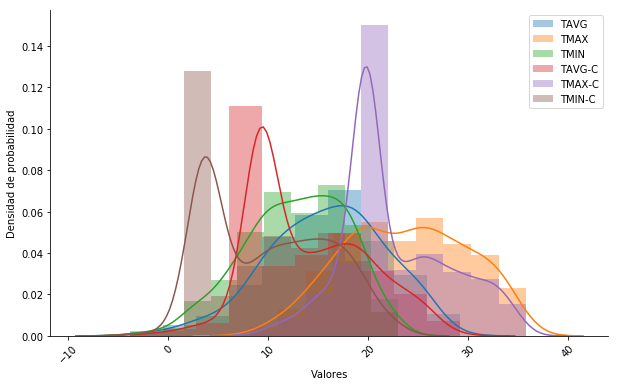

In [102]:
plt.figure(figsize=(10,6))
seaborn.distplot(df_json['temperature'].dropna(), bins=10, label='TAVG')
seaborn.distplot(df_json['temperatureMax'].dropna(), bins=10, label='TMAX')
seaborn.distplot(df_json['temperatureMin'].dropna(), bins=10, label='TMIN')
seaborn.distplot(df_json_clean['temperature'].dropna(), bins=10, label='TAVG-C')
seaborn.distplot(df_json_clean['temperatureMax'].dropna(), bins=10, label='TMAX-C')
seaborn.distplot(df_json_clean['temperatureMin'].dropna(), bins=10, label='TMIN-C')
plt.xticks(rotation=45)
plt.ylabel('Densidad de probabilidad')
plt.xlabel('Valores')
plt.legend()
seaborn.despine()

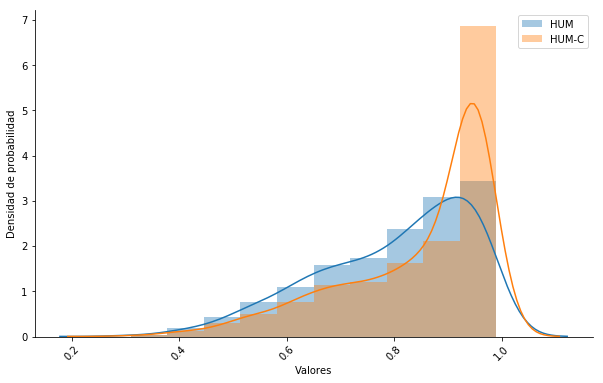

In [103]:
plt.figure(figsize=(10,6))
seaborn.distplot(df_json['humidity'].dropna(), bins=10, label='HUM')
seaborn.distplot(df_json_clean['humidity'].dropna(), bins=10, label='HUM-C')
plt.xticks(rotation=45)
plt.ylabel('Densidad de probabilidad')
plt.xlabel('Valores')
plt.legend()
seaborn.despine()

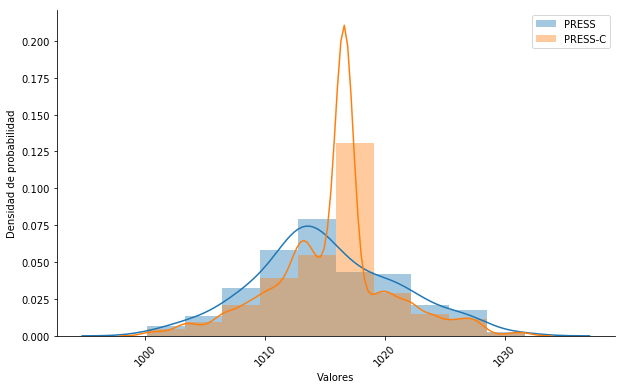

In [104]:
plt.figure(figsize=(10,6))
seaborn.distplot(df_json['pressure'].dropna(), bins=10, label='PRESS')
seaborn.distplot(df_json_clean['pressure'].dropna(), bins=10, label='PRESS-C')
plt.xticks(rotation=45)
plt.ylabel('Densidad de probabilidad')
plt.xlabel('Valores')
plt.legend()
seaborn.despine()

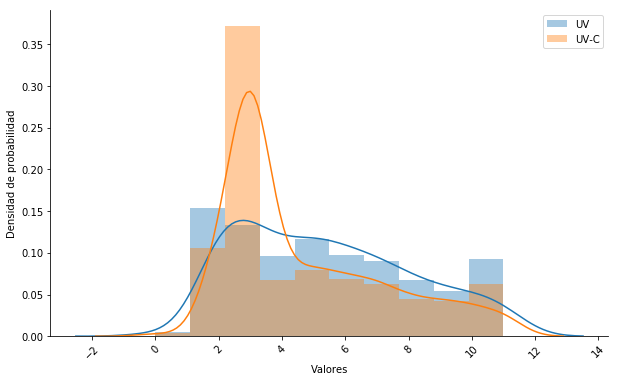

In [105]:
plt.figure(figsize=(10,6))
seaborn.distplot(df_json['uvIndex'].dropna(), bins=10, label='UV')
seaborn.distplot(df_json_clean['uvIndex'].dropna(), bins=10, label='UV-C')
plt.xticks(rotation=45)
plt.ylabel('Densidad de probabilidad')
plt.xlabel('Valores')
plt.legend()
seaborn.despine()

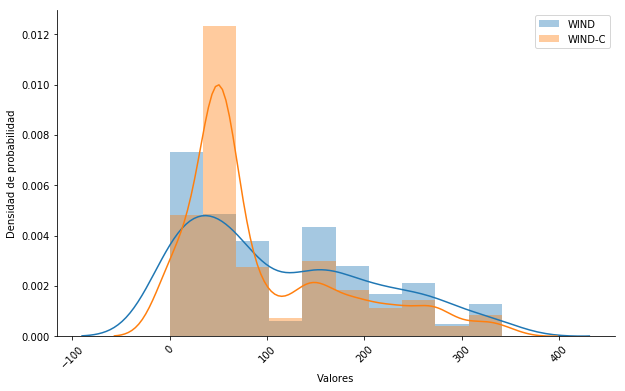

In [106]:
plt.figure(figsize=(10,6))
seaborn.distplot(df_json['windBearing'].dropna(), bins=10, label='WIND')
seaborn.distplot(df_json_clean['windBearing'].dropna(), bins=10, label='WIND-C')
plt.xticks(rotation=45)
plt.ylabel('Densidad de probabilidad')
plt.xlabel('Valores')
plt.legend()
seaborn.despine()

Habiendo interpolado los datos, las curvas de densidad de probabilidades cambiaron. Se entiende a esto como producto de que las frecuencias de datos cambiaron.

A continuación, se exporta la tabla sin NaN e interpolada en un archivo csv.

In [107]:
df_json_clean.to_csv('out.csv', index=False, header=False)